In [495]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# **Análise Exploratória de Dados | Vinícula de Vinhos**

**Problema**

Imagine agora, que você vai atuar como Expert em Data Analytics em uma empresa que exporta vinhos do Brasil para o mundo todo.

Sua área é recém-criada dentro da empresa, e você será responsável pelos relatórios iniciais a serem apresentados em uma reunião de investidores e acionistas, explicando a quantidade de vinhos exportados e os fatores externos que podem vir a surgir e que interferem nas análises:

1. 	Dados climáticos.
2. 	Dados demográficos.
3. 	Dados econômicos.
4.	Dados de avaliações de vinhos.

O Head de Dados pediu para que você construísse uma tabela contendo as seguintes informações:

1. 	País de origem (Brasil).
2. 	País de destino.
3. 	Quantidade em litros de vinho exportado (utilize: 1KG =1L).
4. 	Valor em US$.
5. Os dados que lhe forneceram são de uma vinícola parceira, e podem ser encontrados aqui (http://vitibrasil.cnpuv.embrapa.br/index.php?opcao=opt_01)


**Objetivo**


  Seu objetivo é dizer o montante de venda de exportação nos últimos 15 anos, separando a análise por país e trazendo quais as prospecções futuras e possíveis ações para uma melhoria nas exportações. Construa gráficos atraentes e que passem a ideia central para que os acionistas e investidores possam seguir em frente com suas ações.



---

**INFORMAÇÕES ÚTEIS DAS BASES ABAIXO**

Alguns esclarecimentos se fazem necessários, para que os usuários façam o uso correto das informações:

- Os vinhos nacionais são classificados para fins estatísticos em vinho de mesa (elaborados com uvas americanas e/ou híbridas), vinho fino de mesa (elaborados com uvas Vitis Vinifera L.) e vinho especial (corte de vinho de mesa e fino de mesa).

- Os vinhos importados, denominados de vinhos de mesa são equivalentes aos vinhos finos de mesa nacionais, pois são elaborados com uvas Vitis Vinifera L.

- Os dados constantes da base de dados ALICEweb, referentes à vinhos e espumantes são expressos em quilos, no entanto considerando que a densidade desses produtos é de aproximadamente um (1), consideramos 1 Kg = 1L.

- Os arquivos de download possuem a extensão CSV, para facilitar a importação em planilhas ou banco de dados.



---



### **Importação e visualização dos dados de comércio**

In [496]:
dados_comercio = pd.read_csv("/content/Embrapa/Comercio.csv", sep=";", encoding='utf-8')

In [497]:
dados_comercio.head()

,1,VINHO DE MESA,VINHO DE MESA.1,98327606,114399031,118377367,116617910,94173324,108031792,139238614,...,221590810,206404427,209198468,166769622,176059959,177186273,180446489,215557931,210012238,187939996
0,2,vm_Tinto,Tinto,83300735,98522869,101167932,98196747,77167303,91528090,116407222,...,188033494,178250072,182028785,146646365,154309442,155115499,158519218,189573423,185653678,165067340
1,3,vm_Rosado,Rosado,107681,542274,7770851,8425617,8891367,7261777,11748047,...,1777648,1419855,1409002,1391942,1097426,1972944,1265435,1394901,1931606,2213723
2,4,vm_Branco,Branco,14919190,15333888,9438584,9995546,8114654,9241925,11083345,...,31779668,26734500,25760681,18731315,20653091,20097830,20661836,24589607,22426954,20658933
3,5,VINHO FINO DE MESA,VINHO FINO DE MESA,4430629,4840369,5602091,7202830,7571802,8848303,14095648,...,27912934,20424983,20141631,19630158,15874354,14826143,15684588,24310834,27080445,21533487
4,6,vm_Tinto,Tinto,435354,428927,624499,783508,1616144,2050960,4450570,...,19121750,15354938,15572632,15228514,12021684,11150517,11433702,18202453,19337862,15258778


### **Importação e visualização dos dados de exportação de espumantes**

In [498]:
dados_exp_espumantes = pd.read_csv("/content/Embrapa/ExpEspumantes.csv", sep=";", encoding='utf-8')

In [499]:
dados_exp_espumantes.head()

,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,...,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1
0,1,Alemanha,0,0,0,0,0,0,0,0,...,4092,21373,1003,5466,2388,14767,142,265,1164,6560
1,2,Angola,0,0,0,0,0,0,0,0,...,63,280,1007,3615,24,38,0,0,26383,141588
2,3,Antigua e Barbuda,0,0,0,0,0,0,0,0,...,0,0,7,34,32,328,10,82,65,146
3,4,Antilhas Holandesas,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Argentina,0,0,0,0,0,0,0,0,...,4342,17243,0,0,315,894,0,0,0,0


### **Importação e visualização dos dados de exportação de sucos**

In [500]:
dados_exp_sucos = pd.read_csv("/content/Embrapa/ExpSuco.csv", sep=";",encoding='utf-8')

In [501]:
dados_exp_sucos.head()

,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,...,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1
0,1,África do Sul,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,34344,49753
1,2,"Alemanha, República Democrática da",0,0,0,0,9962,6514,238418,160979,...,96,91,12,24,86,44,13,4,5,24
2,3,Angola,0,0,0,0,0,0,0,0,...,1895,1553,0,0,17766,21627,6073,5915,86536,91839
3,4,Antígua e Barbuda,0,0,0,0,0,0,0,0,...,48,53,95,99,36,25,120,168,48,57
4,5,Antilhas Holandesas,0,0,0,0,1125,945,144,135,...,0,0,0,0,0,0,0,0,0,0


### **Importação e visualização dos dados de exportação de uvas**

In [502]:
dados_exp_uvas = pd.read_csv("/content/Embrapa/ExpUva.csv", sep=";", encoding='utf-8')

In [503]:
dados_exp_uvas.head()

,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,...,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1
0,1,Africa do Sul,0,0,0,0,0,0,0,0,...,0,0,8,30,44,152,0,0,0,0
1,2,"Alemanha, República Democrática",0,0,135,103,0,0,0,0,...,2870420,5833592,1863097,3480290,1371694,2791556,1461590,2569452,559012,1213303
2,3,Angola,0,0,0,0,0,0,0,0,...,15,33,75,145,0,0,0,0,0,0
3,4,Antígua e Barbuda,0,0,0,0,0,0,0,0,...,65,164,190,580,304,1013,437,1349,253,999
4,5,Arabia Saudita,0,0,0,0,0,0,0,0,...,14725,28615,167731,271231,32325,95999,2818,14671,12224,53675


### **Importação e visualização dos dados de exportação de vinhos**

In [504]:
dados_exp_vinhos = pd.read_csv("/content/Embrapa/ExpVinho.csv",  encoding='utf-8',  sep=';', thousands='.', decimal=',')

In [505]:
dados_exp_vinhos.head()

,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,...,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1
0,1,Afeganistão,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,11,46,0,0
1,2,África do Sul,0,0,0,0,0,0,0,0,...,0,0,26,95,4,21,0,0,0,0
2,3,"Alemanha, República Democrática",0,0,0,0,4168,2630,12000,8250,...,10794,45382,3660,25467,6261,32605,2698,6741,7630,45367
3,4,Angola,0,0,0,0,0,0,0,0,...,477,709,345,1065,0,0,0,0,4068,4761
4,5,Anguilla,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### **Importação e visualização dos dados de importação de espumantes**

In [506]:
dados_imp_espumantes = pd.read_csv("/content/Embrapa/ImpEspumantes.csv", sep=";", encoding='utf-8')

In [507]:
dados_imp_espumantes.head()

,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,...,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1
0,1,Africa do Sul,0,0,0,0,0,0,0,0,...,15368,74800,17583,72077,3574,14542,6980,36677,9882,64582
1,2,Alemanha,0,0,25,36,2864,2479,2900,3130,...,18376,82273,26853,169989,21174,65359,19977,46237,12447,26877
2,3,Argentina,4980,3836,8811,7543,35301,26909,39208,20230,...,706478,2462909,757716,2282614,469547,1304986,723847,2211657,1333420,4123623
3,4,Austrália,0,0,0,0,0,0,0,0,...,57917,212199,16701,27592,7426,15190,8062,26208,0,0
4,5,Austria,0,0,0,0,0,0,0,0,...,1228,11638,1269,11571,909,9399,90,1434,0,0


### **Importação e visualização dos dados de importação de uvas frescas**

In [508]:
dados_imp_frescas = pd.read_csv("/content/Embrapa/ImpFrescas.csv", sep=";", encoding='utf-8')

In [509]:
dados_imp_frescas.head()

,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,...,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1
0,1,Argélia,0,0,0,0,0,0,0,0,...,0,0,0,0,21746,34476,0,0,0,0
1,2,Argentina,2412831,782408,1805310,684328,1965010,779841,396840,253061,...,1616855,2499358,3211513,4659791,1798220,2559671,1356735,1696659,771187,1053519
2,3,Brasil,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,Chile,1557316,409704,1485897,381705,1680664,578569,2472710,958295,...,16103415,25237521,9082957,13450429,4943446,6986630,3888723,5404163,6536258,9640996
4,5,Colômbia,0,0,3312,2168,0,0,63645,37098,...,0,0,0,0,0,0,0,0,0,0


### **Importação e visualização dos dados de importação de uvas passas**

In [510]:
dados_imp_passas = pd.read_csv("/content/Embrapa/ImpPassas.csv", sep=";", encoding='utf-8')

In [511]:
dados_imp_passas.head()

,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,...,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1
0,1,Afeganistão,0,0,0,0,0,0,0,0,...,0,0,40000,65452,0,0,0,484,0,0
1,2,África do Sul,0,0,0,0,0,0,0,0,...,1089700,3106052,270875,763921,616688,1433381,327000,531327,657826,1266633
2,3,"Alemanha, República Democrática",0,0,0,0,3000,3366,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,Arábia Saudita,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Argentina,1530058,845068,1206326,936632,1047482,981648,1277380,1848195,...,23564519,43501396,24135143,48810789,24992502,36743996,24015825,33337604,20829418,35659325


### **Importação e visualização dos dados de importação de sucos**

In [512]:
dados_imp_sucos = pd.read_csv("/content/Embrapa/ImpSuco.csv", sep=";", encoding='utf-8')

In [513]:
dados_imp_sucos.head()

,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,...,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1,2021.2,2021.3
0,1,Africa do Sul,0,0,0,0,0,0,0,0,...,21618,18334,0,0,0,0,0,0,0,0
1,2,Alemanha,0,0,0,0,0,0,0,0,...,80,652,0,0,0,0,0,0,0,0
2,3,Argentina,0,0,0,0,0,0,3600,1350,...,2998,3139,0,0,0,0,0,0,0,0
3,4,Austria,0,0,0,0,0,0,0,0,...,0,0,666,655,0,0,0,0,0,0
4,5,Canadá,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### **Importação e visualização dos dados de importação de vinhos**

In [514]:
dados_imp_vinhos = pd.read_csv("/content/Embrapa/ImpVinhos.csv", sep=";", encoding='utf-8')

In [515]:
dados_imp_vinhos.head()

,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,...,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1
0,1,Africa do Sul,0,0.0,0,0,0,0,0,0,...,1127053,3574371,1092042,3604038,627150,1701072,859169,2508140,738116.0,2266827.0
1,2,Alemanha,52297,30498.0,34606,26027,134438,92103,111523,98638,...,142971,516975,101055,412794,136992,504168,106541,546967,92600.0,438595.0
2,3,Argélia,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
3,4,Arábia Saudita,0,0.0,0,0,0,0,0,0,...,563,3249,0,0,0,0,2510,8761,0.0,0.0
4,5,Argentina,19525,12260.0,24942,15022,104906,58137,116887,76121,...,15221318,52817642,16548931,54527380,22610267,66322932,26869241,79527959,27980574.0,87519642.0


### **Importação e visualização dos dados de produção**

In [516]:
dados_producao = pd.read_csv("/content/Embrapa/Producao.csv", sep=";", encoding='utf-8')

In [517]:
dados_producao.head()

,id,produto,1970,1971,1972,1973,1974,1975,1976,1977,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,1,VINHO DE MESA,217208604,154264651,146953297,116710345,193875345,177401209,144565438,195359778,...,196904222,196173123,210308560,86319015,255015187,218375636,144629737,124200414,173899995,195031611
1,2,Tinto,174224052,121133369,118180926,88589019,146544484,144274134,118360170,154801826,...,163111797,157776363,169811472,75279191,1365957,188270142,121045115,103916391,146075996,162844214
2,3,Branco,748400,1160500,1812367,243900,4138768,1441507,1871473,4954387,...,32066403,37438069,39557250,10727099,217527985,29229970,22032828,19568734,26432799,30198430
3,4,Rosado,42236152,31970782,26960004,27877426,43192093,31685568,24333795,35603565,...,1726022,958691,939838,312725,36121245,875524,1551794,715289,1391200,1988968
4,5,VINHO FINO DE MESA (VINÍFERA),23899346,23586062,21078771,12368410,31644124,39424590,34500590,41264971,...,45782530,38464314,37148982,18070626,44537870,38707220,37615422,32516686,43474998,47511796


In [518]:
# Criação do DF com os dados dos últimos 15 anos
xv_anos_prod = [ano for ano in dados_producao.columns[2:] if int(ano[:4]) >= 2007]
prod_xva = dados_producao[['produto'] + xv_anos_prod].copy()
prod_xva.rename(columns={'País': 'Destino'}, inplace=True)
prod_xva['Origem'] = 'Brasil'
prod_xva.head()

# Adição do KG e $ no nome das colunas
for coluna in prod_xva.columns[1:]:
    if coluna != 'Origem' and coluna != 'Destino':
        sufixo = '_$' if len(coluna) > 4 else '_kg'
        prod_xva.rename(columns={coluna: coluna + sufixo}, inplace=True)

prod_xva_quant = prod_xva[['Origem', 'produto'] + [coluna for coluna in prod_xva.columns if coluna.endswith('_kg')]].copy()
prod_xva_quant['total'] = prod_xva_quant.iloc[:, 2:].sum(axis=1)
prod_xva_quant = prod_xva_quant[prod_xva_quant['total'] > 0]
prod_xva_quant.head()

# Criação DF conciso
prod_quant = prod_xva_quant[['Origem', 'produto', 'total']].copy()
prod_quant['total'] = prod_quant['total'].astype(str) + ' L'
prod_quant = prod_quant.sort_values(by='total', ascending=True)
print(prod_quant)

    Origem                                    produto         total
8   Brasil                                       SUCO  1023202979 L
24  Brasil                          Mosto concentrado      110000 L
21  Brasil                              Bebida de uva     1105536 L
28  Brasil                              Néctar de uva      111846 L
36  Brasil                                     Brandy         120 L
23  Brasil                              Mosto simples  1313500960 L
14  Brasil                                  DERIVADOS  1431691926 L
20  Brasil                     Base Charmat champanha    14712422 L
26  Brasil                         Mosto dessulfitado     1538000 L
43  Brasil                             Vinho Composto      163000 L
7   Brasil                                     Rosado    17518851 L
29  Brasil                                  Licorosos      175595 L
12  Brasil                       Suco de uva orgânico     1782821 L
27  Brasil                                   Mis

In [519]:
import pandas as pd

# Supondo que 'prod_quant' seja o DataFrame original com os dados dos produtos

# Criação do DataFrame conciso
prod_quant = prod_xva_quant[['Origem', 'produto', 'total']].copy()

# Converter a coluna 'total' para string
prod_quant['total'] = prod_quant['total'].astype(str)

# Remover a unidade de medida (' L') da coluna 'total'
prod_quant['total'] = prod_quant['total'].str.replace(' L', '')

# Converter a coluna 'total' para tipo numérico (float)
prod_quant['total'] = prod_quant['total'].astype(float)

# Calcular a porcentagem do total para cada produto
total_sum = prod_quant['total'].sum()
prod_quant['percentagem_total'] = (prod_quant['total'] / total_sum) * 100

# Converter as porcentagens para inteiros e adicionar o símbolo de percentagem
prod_quant['percentagem_total'] = prod_quant['percentagem_total'].round(1).astype(str) + '%'

prod_quant.head()


,Origem,produto,total,percentagem_total
0,Brasil,VINHO DE MESA,3.234956e+09,25.6%
1,Brasil,Tinto,2.466133e+09,19.5%
2,Brasil,Branco,7.054053e+08,5.6%
3,Brasil,Rosado,6.341779e+07,0.5%
4,Brasil,VINHO FINO DE MESA (VINÍFERA),6.318469e+08,5.0%


In [520]:
import plotly.express as px

# Ordenar o DataFrame pela porcentagem total do maior para o menor
prod_quant_sorted = prod_quant.sort_values(by='percentagem_total', ascending=False)

# Ajustar os valores de porcentagem para estar na faixa de 0 a 100
prod_quant_sorted['percentagem_total'] = prod_quant_sorted['percentagem_total'].str.rstrip('%').astype(float)

# Criar o Funil Plot
fig = px.funnel_area(names=prod_quant_sorted['produto'], values=prod_quant_sorted['percentagem_total'])

# Atualizar o layout do gráfico
fig.update_layout(
    title='Produtos mais Produzidos',
    xaxis_title='Porcentagem do Total',
    yaxis_title='Produto',
    title_x=0.5,  # Centraliza o título horizontalmente
    yaxis_tickangle=-45  # Gira os rótulos do eixo y em 45 graus
)

# Mostrar o gráfico
fig.show()


## **DataFrame | Exportação de Vinhos**

Importar o Arquivo e rodar esta primeiro para criar os DF


## Variaveis importantes

- **dados_exp_vinhos** = Data frame inteiro, com todos os dados

- **vinho_xva** = dados_exp_vinhos filtrados nos ultimos 15 anos com as colunas de valor e quantidade identificadas.

- **vinho_xva_valor, _quant** = vinho_xva somente com as colunas de valor ou quantidade.

- **expo_valor, _quant** = dataframes concisos, contendo apenas origem, destino e total.

- **dados_xva** = dataframe final contendo o destino, origem, e totais de valor e quantidade.

In [521]:
dados_exp_vinhos = pd.read_csv('/content/Embrapa/ExpVinho.csv', encoding='utf-8', sep=';', thousands='.', decimal=',')

In [522]:
# Criação do DF com os dados dos últimos 15 anos
xv_anos = [ano for ano in dados_exp_vinhos.columns[2:] if int(ano[:4]) >= 2007]
vinho_xva = dados_exp_vinhos[['País'] + xv_anos].copy()
vinho_xva.rename(columns={'País': 'Destino'}, inplace=True)
vinho_xva['Origem'] = 'Brasil'

# Adição do KG e $ no nome das colunas
for coluna in vinho_xva.columns[1:]:
    if coluna != 'Origem' and coluna != 'Destino':
        sufixo = '_$' if len(coluna) > 4 else '_kg'
        vinho_xva.rename(columns={coluna: coluna + sufixo}, inplace=True)

# Criação dos DataFrames com base nas listas
vinho_xva_valor = vinho_xva[['Origem', 'Destino'] + [coluna for coluna in vinho_xva.columns if coluna.endswith('_$')]].copy()
vinho_xva_valor['total'] = vinho_xva_valor.iloc[:, 2:].sum(axis=1)
vinho_xva_valor = vinho_xva_valor[vinho_xva_valor['total'] > 0]

vinho_xva_quant = vinho_xva[['Origem', 'Destino'] + [coluna for coluna in vinho_xva.columns if coluna.endswith('_kg')]].copy()
vinho_xva_quant['total'] = vinho_xva_quant.iloc[:, 2:].sum(axis=1)
vinho_xva_quant = vinho_xva_quant[vinho_xva_quant['total'] > 0]

# Criação DF conciso
expo_valor = vinho_xva_valor[['Origem', 'Destino', 'total']].copy()
expo_valor['total'] = expo_valor['total'].astype(int)
expo_valor = expo_valor.sort_values(by='total', ascending=False)
expo_valor['Posição'] = expo_valor.index.astype(str)

expo_quant = vinho_xva_quant[['Origem', 'Destino', 'total']].copy()
expo_quant['total'] = expo_quant['total'].astype(int)
expo_quant = expo_quant.sort_values(by='total', ascending=False)
expo_quant['Posição'] = expo_quant.index.astype(str)

# Juntando os DataFrames expo_quant e expo_valor
dados_xva = pd.merge(expo_quant, expo_valor, on=['Destino', 'Origem'], suffixes=('_quantidade', '_valor'))
dados_xva.rename(columns={'total_quantidade': 'Quantidade', 'total_valor': 'Valor'}, inplace=True)
dados_xva = dados_xva[['Origem', 'Destino', 'Quantidade', 'Valor']]
dados_xva.head()

,Origem,Destino,Quantidade,Valor
0,Brasil,Rússia,39296199,25677644
1,Brasil,Paraguai,30500229,39520550
2,Brasil,Estados Unidos,4042624,10494605
3,Brasil,China,2517096,4776915
4,Brasil,Espanha,1993000,3808552


In [523]:
import pandas as pd



# Agrupar o DataFrame pela coluna "Origem" e somar as quantidades e os valores correspondentes
resumo_por_origem = dados_xva.groupby('Origem').agg({'Quantidade': 'sum', 'Valor': 'sum'})

# Exibir o resumo por origem
print(resumo_por_origem)


        Quantidade      Valor
Origem                       
Brasil    91264184  116330466


In [524]:


# Transformar a quantidade em milhões
resumo_por_origem['Quantidade'] = resumo_por_origem['Quantidade'] / 1000000
# Adicionar a unidade de medida
resumo_por_origem['Quantidade'] = resumo_por_origem['Quantidade'].astype(str) + ' milhões'

# Transformar o valor em milhões
resumo_por_origem['Valor'] = resumo_por_origem['Valor'] / 1000000
# Adicionar a unidade de medida
resumo_por_origem['Valor'] = '$' + resumo_por_origem['Valor'].astype(str) + ' milhões'

# Exibir o DataFrame atualizado
print(resumo_por_origem)


               Quantidade                Valor
Origem                                        
Brasil  91.264184 milhões  $116.330466 milhões


In [525]:


# Converter os valores de quantidade e valor para numéricos
resumo_por_origem['Quantidade'] = resumo_por_origem['Quantidade'].str.replace(' milhões', '').astype(float)
resumo_por_origem['Valor'] = resumo_por_origem['Valor'].str.replace('$', '').str.replace(' milhões', '').astype(float)

# Extrair os valores de quantidade e valor
quantidade_total = resumo_por_origem.loc['Brasil', 'Quantidade']
valor_total = resumo_por_origem.loc['Brasil', 'Valor']

# Calcular o preço médio por litro de vinho
preco_medio_por_litro = valor_total / quantidade_total

# Exibir o resultado
print("O preço médio por litro de vinho é:", preco_medio_por_litro)


O preço médio por litro de vinho é: 1.274656287947526


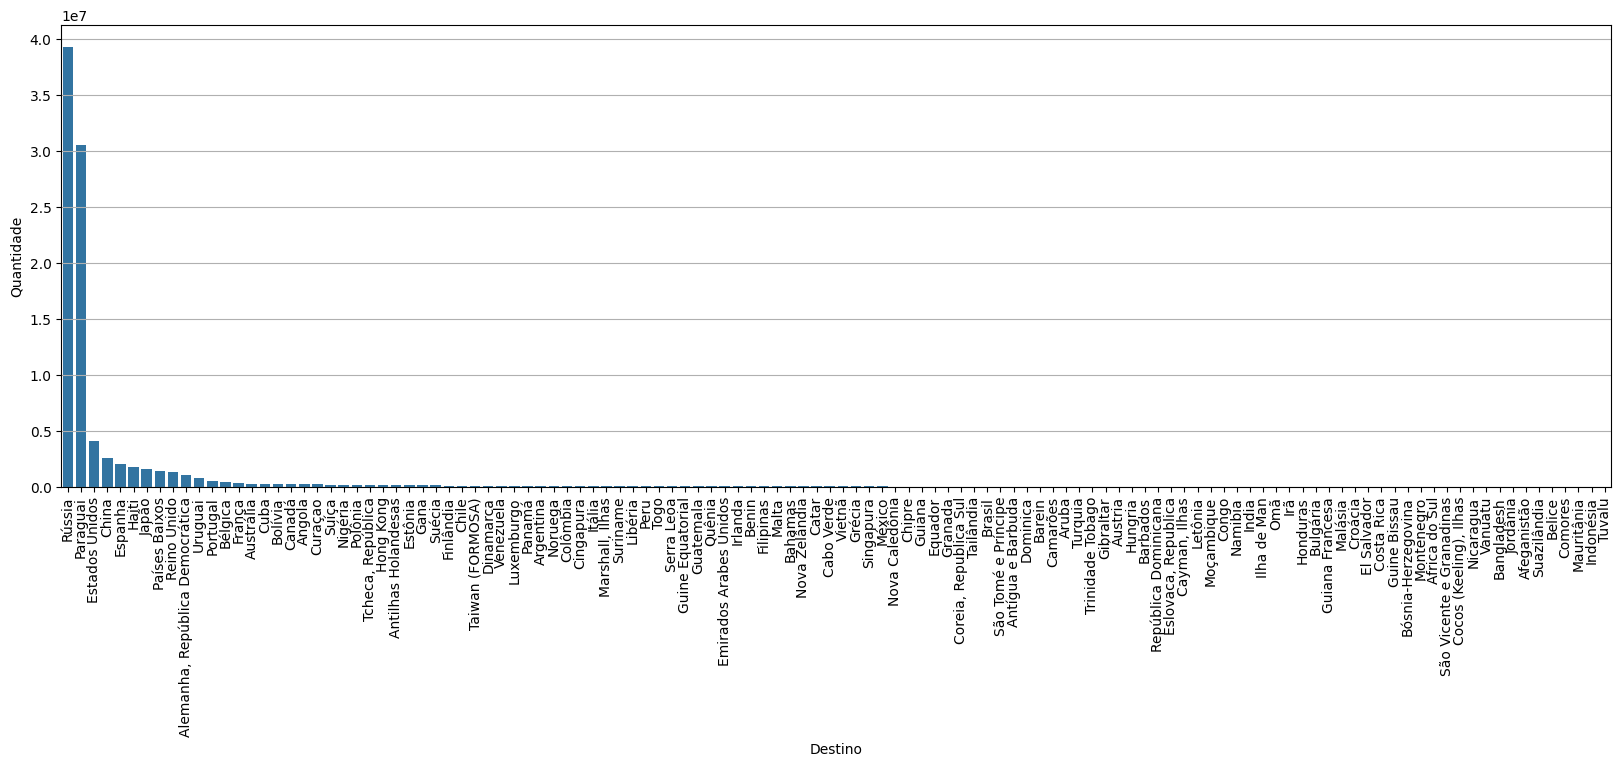

In [526]:
plt.figure(figsize=(20,6))
plt.xticks(rotation=90)

plt.grid()

sns.barplot(data=dados_xva, x='Destino', y='Quantidade')

plt.show()

# Tarefas

1. Separando a análise por país - usar query do Bruno - subplot 10 primeiros países - quebrar em 3 blocos de 5 anos cada depois - *Phaola*

p_anos = vinho_xva_valor.drop('total', axis='columns')

2. Correlacionar a produção do vinho de mesa com a exportação ano a ano e analisar o valor conjuntamente (produzir muito, exportar pra mais, cobrando menos, vale a pena?) - *Malu*

3. Pesquisar exportação de vinhos do Paraguai (achar fonte) e fazer o mesmo df (eles estão importando muito para exportar depois?) - *Evandro*

4. Fazer um plot por região - fazer uma lista para cada continente e inserir os respectivos países pertencentes - *Rebeka*

5. Cruzamento de cotação com exportações


Reunião 2/5

https://www.oiv.int/what-we-do/country-report?oiv

Seu objetivo é dizer o montante de venda de exportação nos últimos 15 anos, separando a análise por país e trazendo quais as prospecções futuras e possíveis ações para uma melhoria nas exportações. Construa gráficos atraentes e que passem a ideia central para que os acionistas e investidores possam seguir em frente com suas ações.

# Analises Basicas

- Valor por país - OK
- Quantidades por país - OK
- Valor médio por litro - OK
- Valor médio e quantidade média por país Anual - OK
- Relação do Valor total de exportação BR e da Vinicola
- Dados Climaticos, Demograficos, Economicos, Avaliação de vinhos

In [527]:
# Médio do Litro
dados_xva['media_litro$'] = dados_xva['Valor'] / dados_xva['Quantidade']

# Média quant, val ano
dados_xva['media_quant_ano'] = (dados_xva['Quantidade'] / 15).astype(int)
dados_xva['media_valor_ano'] = (dados_xva['Valor'] / 15).astype(int)



In [528]:
dados_xva.head()

,Origem,Destino,Quantidade,Valor,media_litro$,media_quant_ano,media_valor_ano
0,Brasil,Rússia,39296199,25677644,0.653438,2619746,1711842
1,Brasil,Paraguai,30500229,39520550,1.295746,2033348,2634703
2,Brasil,Estados Unidos,4042624,10494605,2.595988,269508,699640
3,Brasil,China,2517096,4776915,1.897788,167806,318461
4,Brasil,Espanha,1993000,3808552,1.910964,132866,253903


# **Cruzamento de cotação com exportações - Bruno**

In [529]:
dolar_xva = pd.read_csv('/content/Cotação do Dólar por período.csv')
dolar_xva

dolar_xva['dataHoraCotacao'] = pd.to_datetime(dolar_xva['dataHoraCotacao'])
dolar_xva['dia'] = dolar_xva['dataHoraCotacao'].dt.day
dolar_xva['mes'] = dolar_xva['dataHoraCotacao'].dt.month
dolar_xva['ano'] = dolar_xva['dataHoraCotacao'].dt.year

In [530]:
dolar_xva.head()

,cotacaoCompra,cotacaoVenda,dataHoraCotacao,dia,mes,ano
0,"1,7714","1,7722",2008-01-02 17:33:00,2,1,2008
1,"1,7561","1,7569",2008-01-03 17:39:00,3,1,2008
2,"1,7566","1,7574",2008-01-04 17:33:00,4,1,2008
3,"1,7667","1,7675",2008-01-07 17:41:00,7,1,2008
4,"1,7546","1,7554",2008-01-08 17:39:00,8,1,2008


In [531]:
dolar_xva.head()

,cotacaoCompra,cotacaoVenda,dataHoraCotacao,dia,mes,ano
0,"1,7714","1,7722",2008-01-02 17:33:00,2,1,2008
1,"1,7561","1,7569",2008-01-03 17:39:00,3,1,2008
2,"1,7566","1,7574",2008-01-04 17:33:00,4,1,2008
3,"1,7667","1,7675",2008-01-07 17:41:00,7,1,2008
4,"1,7546","1,7554",2008-01-08 17:39:00,8,1,2008


In [532]:
dolar1 = dolar_xva.query('mes == 2 & dia == 1').copy()
dolar2 = dolar_xva.query('mes == 2 & dia == 3').copy()
dolar3 = dolar_xva.query('mes == 2 & dia == 7').copy()

dolar_anual = pd.concat([dolar1, dolar2, dolar3])
dolar_anual.drop_duplicates(subset='ano', inplace=True)
dolar_anual = dolar_anual.sort_values('cotacaoCompra', ascending=False)

In [533]:
dolar_anual['cotacaoCompra'] = dolar_anual['cotacaoCompra'].str.replace(',', '.').astype(float)


In [534]:
dolar_anual.sort_values(by="ano") # Adicionei pra visualizar o dataframe - Malu

,cotacaoCompra,cotacaoVenda,dataHoraCotacao,dia,mes,ano
22,1.7443,"1,7451",2008-02-01 17:39:00.000,1,2,2008
276,2.3136,"2,3144",2009-02-03 17:38:00.000,3,2,2009
524,1.8765,"1,8773",2010-02-01 17:33:00.000,1,2,2010
776,1.6623,"1,6631",2011-02-01 17:35:29.186,1,2,2011
1028,1.7370,"1,7376",2012-02-01 13:10:38.372,1,2,2012
1279,1.9838,"1,9843",2013-02-01 13:02:58.868,1,2,2013
1532,2.4084,"2,409",2014-02-03 13:09:29.876,3,2,2014
1785,2.7053,"2,7059",2015-02-03 13:10:07.037,3,2,2015
2033,3.9979,"3,9986",2016-02-01 13:03:39.417,1,2,2016
2286,3.1473,"3,1479",2017-02-01 13:05:55.817,1,2,2017


In [535]:
expo_ano = vinho_xva_quant
expo_ano.drop('Origem', axis=1, inplace=True)
expo_ano.drop('Destino', axis=1, inplace=True)
expo_ano.drop('total', axis=1, inplace=True)

In [536]:
for i in expo_ano.columns:
  expo_ano.rename(columns={i : i.strip('_kg')}, inplace=True)

In [537]:
expo_anual = expo_ano.sum().reset_index()
expo_anual.columns = ['ano', 'quantidade']

In [538]:
expo_anual = expo_anual.sort_values('ano')

In [539]:
expo_anual.drop(0, axis=0, inplace=True)

In [540]:
expo_anual.sort_values(by="ano") # Adicionei pra visualizar o dataframe - Malu

,ano,quantidade
1,2008,10346323
2,2009,25514198
3,2010,1280574
4,2011,1214834
5,2012,5775376
6,2013,9149059
7,2014,2324029
8,2015,1198479
9,2016,1786549
10,2017,2889572


In [541]:
#expo_anual['quantidade'] = expo_anual['quantidade'] / 1000

In [542]:
# janela, graficos = plt.subplots(nrows=2, ncols=1, figsize=(20,10))
# plt.tight_layout()

# plt.title('Cotação')
# sns.lineplot(data=expo_anual, x='ano', y='quantidade exportada', ax=graficos[0])
# sns.lineplot(data=dolar_anual,x='ano', y='cotacaoCompra', ax=graficos[1])

# # Adicionei pra ter ticks anuais - Malu
# graficos[0].set_xticks(expo_anual['ano'].unique())
# graficos[1].set_xticks(dolar_anual['ano'].unique())

# # Grids para visualizar os valores - Malu
# graficos[0].grid(True, alpha=0.5)
# graficos[1].grid(True, alpha=0.5)

# plt.show()

'''
Malu: em 2009 temos uma exportação expressiva e um aumento na cotação de compra
      em 2016 temos um aumento do dolar e não tem resposta na exportação
      A partir de 2018 até 2021 o dolar foi aumentando e a exportação (a partie de 2019) também, com quedas em 2022
      Não sei se dá pra ter uma correlação com esses dados
'''

'\nMalu: em 2009 temos uma exportação expressiva e um aumento na cotação de compra\n      em 2016 temos um aumento do dolar e não tem resposta na exportação\n      A partir de 2018 até 2021 o dolar foi aumentando e a exportação (a partie de 2019) também, com quedas em 2022\n      Não sei se dá pra ter uma correlação com esses dados\n'

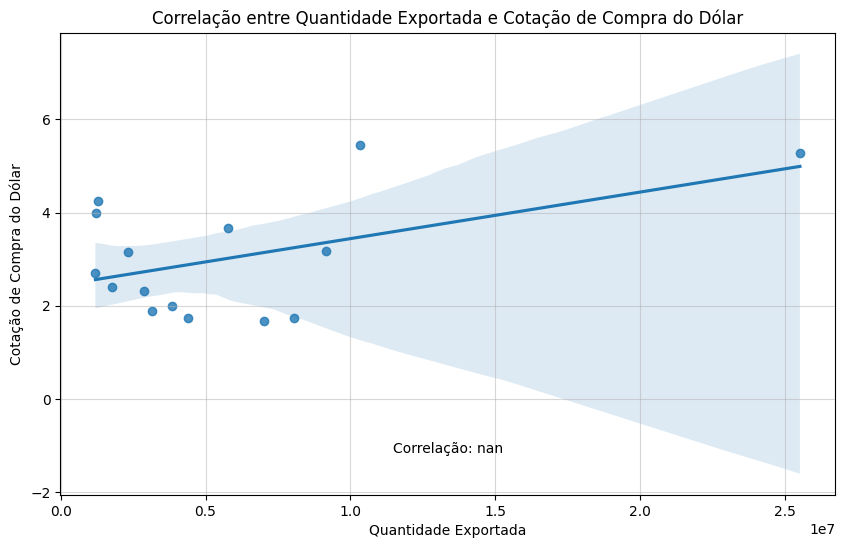

In [543]:
# Vou tentar fazer um gráfico correlacionando esses valores - Malu

# Calcula a correlação entre as colunas "quantidade" e "cotacaoCompra"
correlation = expo_anual['quantidade'].corr(dolar_anual['cotacaoCompra'])

# Cria o gráfico de dispersão com a linha de regressão
plt.figure(figsize=(10, 6))
sns.regplot(x=expo_anual['quantidade'], y=dolar_anual['cotacaoCompra'])

# Adiciona título e rótulos dos eixos
plt.title('Correlação entre Quantidade Exportada e Cotação de Compra do Dólar')
plt.xlabel('Quantidade Exportada')
plt.ylabel('Cotação de Compra do Dólar')

# Adiciona o valor da correlação no gráfico
plt.text(0.5, 0.1, f'Correlação: {correlation:.2f}', ha='center', va='center', transform=plt.gca().transAxes)

'''
Se o gráfico está mostrando "Correlação: nan"
isso indica que o cálculo da correlação resultou em um valor "NaN" (Not a Number)
o que significa que não foi possível calcular a correlação entre as duas variáveis.
'''

# Exibe o gráfico
plt.grid(True, alpha=0.5)
plt.show()

In [544]:
expo_anual.head()

,ano,quantidade
1,2008,10346323
2,2009,25514198
3,2010,1280574
4,2011,1214834
5,2012,5775376


In [545]:
dolar_ano_compra = dolar_anual[['ano', 'cotacaoCompra']]
dolar_ano_compra.head()

,ano,cotacaoCompra
3287,2021,5.4602
3539,2022,5.2804
3038,2020,4.2469
2033,2016,3.9979
2785,2019,3.6688


In [546]:
expo_anual['ano'] = expo_anual['ano'].astype(int)
dolar_ano_compra['ano'] = dolar_anual['ano'].astype(int)

<ipython-input-546-447f594ea075>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [547]:
expo_dolar_anual = pd.merge(expo_anual, dolar_ano_compra, on='ano')

In [548]:
expo_dolar_anual['cotacaoCompra'] = expo_dolar_anual['cotacaoCompra'] * 100000

In [549]:
expo_dolar_anual

,ano,quantidade,cotacaoCompra
0,2008,10346323,174430.0
1,2009,25514198,231360.0
2,2010,1280574,187650.0
3,2011,1214834,166230.0
4,2012,5775376,173700.0
5,2013,9149059,198380.0
6,2014,2324029,240840.0
7,2015,1198479,270530.0
8,2016,1786549,399790.0
9,2017,2889572,314730.0


<Axes: xlabel='ano', ylabel='quantidade'>

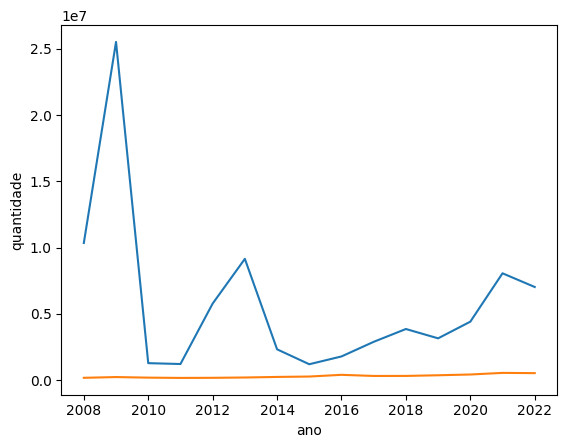

In [550]:
sns.lineplot(data=expo_dolar_anual, x='ano', y='quantidade')
sns.lineplot(data=expo_dolar_anual, x='ano', y='cotacaoCompra')

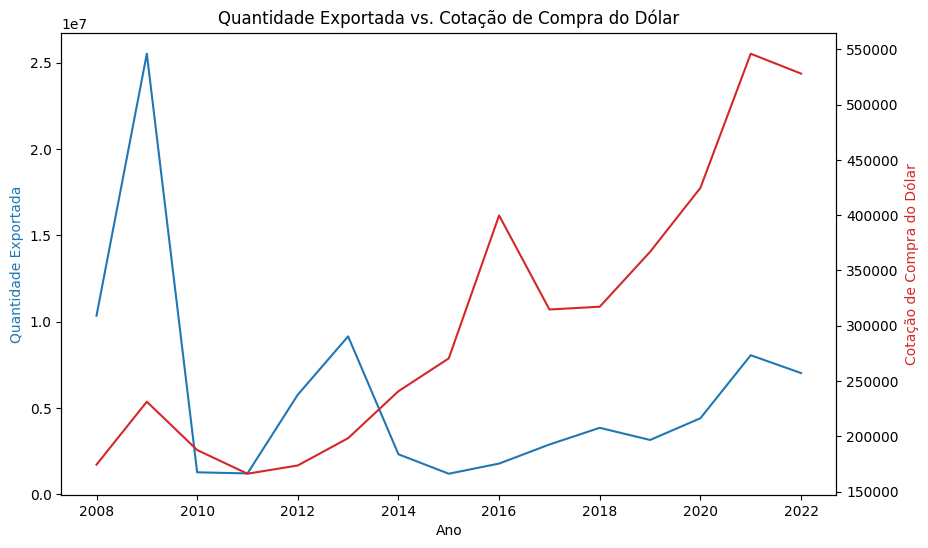

In [551]:
# Fiz uma gambiarra pra ter dois eixos Y aqui - Malu

# Criação da figura e do primeiro eixo y
fig, ax1 = plt.subplots(figsize=(10, 6))

# Adicionando título ao gráfico
plt.title('Quantidade Exportada vs. Cotação de Compra do Dólar')

# Plotando a primeira série de dados (Quantidade Exportada)
color = 'tab:blue'
ax1.set_xlabel('Ano')
ax1.set_ylabel('Quantidade Exportada', color=color)
sns.lineplot(data=expo_dolar_anual, x='ano', y='quantidade', color=color, ax=ax1)

# Criação do segundo eixo y
ax2 = ax1.twinx()

# Plotando a segunda série de dados (Cotação de Compra do Dólar)
color = 'tab:red'
ax2.set_ylabel('Cotação de Compra do Dólar', color=color)
sns.lineplot(data=expo_dolar_anual, x='ano', y='cotacaoCompra', color=color, ax=ax2)

# Remoção do grid
ax1.grid(False)
ax2.grid(False)

# Exibição do gráfico
plt.show()

# **PLOT POR REGIÃO -  REBEKA**

RASCUNHO

In [552]:
lista_strings = ["América do Sul", "América Central", "América do Norte","África","Europa","Ásia","Oceania"]

In [553]:
# Criando uma lista de listas com os continentes e seus respectivos países???? Precisa adc os outros países
continentes_paises =["América do Sul", ["Brasil", "Argentina", "Colômbia", "Chile","Peru","Bolívia","Equador","Guiana","Paraguai","Suriname","Uruguai","Venezuela"]],
["América do Norte", ["Estados Unidos", "Canadá", "México"]],
["Europa", ["França", "Alemanha", "Reino Unido", "Itália", "Espanha"]],
["África", ["Nigéria", "Egito", "África do Sul", "Etiópia", "Quênia"]],
["Ásia", ["China", "Índia", "Indonésia", "Paquistão", "Bangladesh"]]

['Ásia', ['China', 'Índia', 'Indonésia', 'Paquistão', 'Bangladesh']]

In [554]:
paises_am_norte = "Estados Unidos", "Canadá", "México"
for item in continentes_paises:
    if item[0] == "América do Norte":
        paises_am_norte = item[1]
        break


In [555]:
print("Países da América do Norte:", paises_am_norte)


Países da América do Norte: ('Estados Unidos', 'Canadá', 'México')


In [556]:
continentes = "América do Sul", "América Central", "América do Norte","África","Europa","Ásia","Oceania"
for item in continentes_paises:
    if item[0] == "Continentes":
        paises_am_norte = item[1]
        break

In [557]:
import matplotlib.pyplot as plt


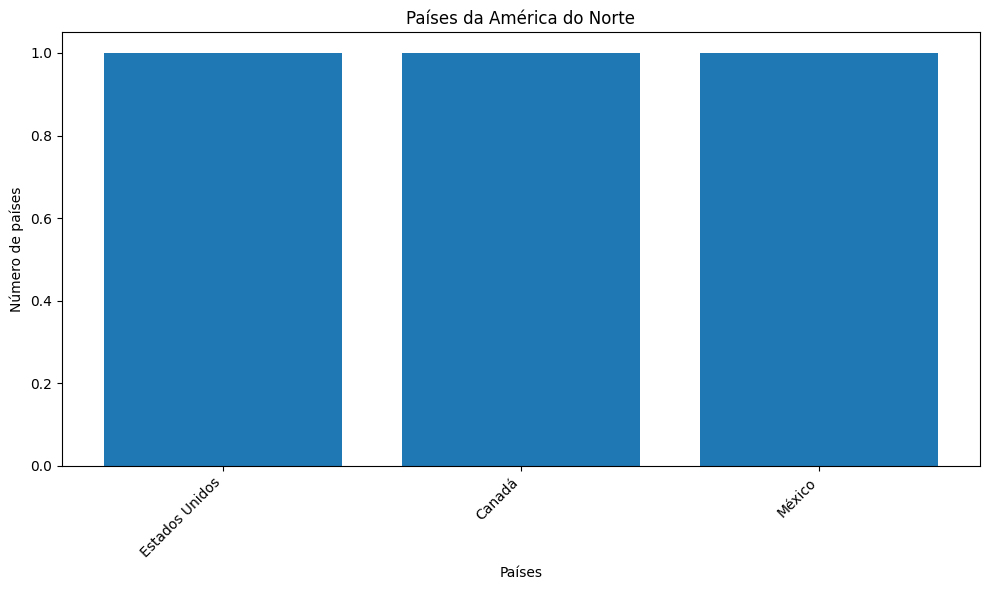

In [558]:
#Testando gráfico. Quais dados preciso colocar ?
plt.figure(figsize=(10, 6))
plt.bar(range(len(paises_am_norte)), [1] * len(paises_am_norte), align='center', tick_label=paises_am_norte)
plt.title('Países da América do Norte')
plt.xlabel('Países')
plt.ylabel('Número de países')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

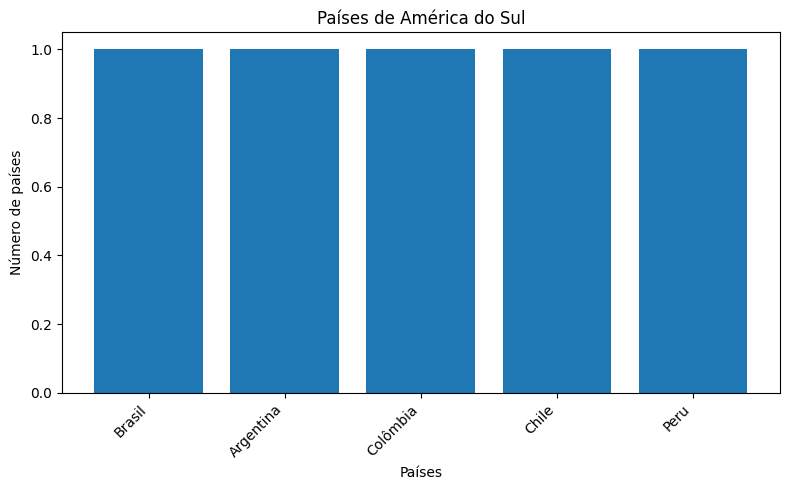

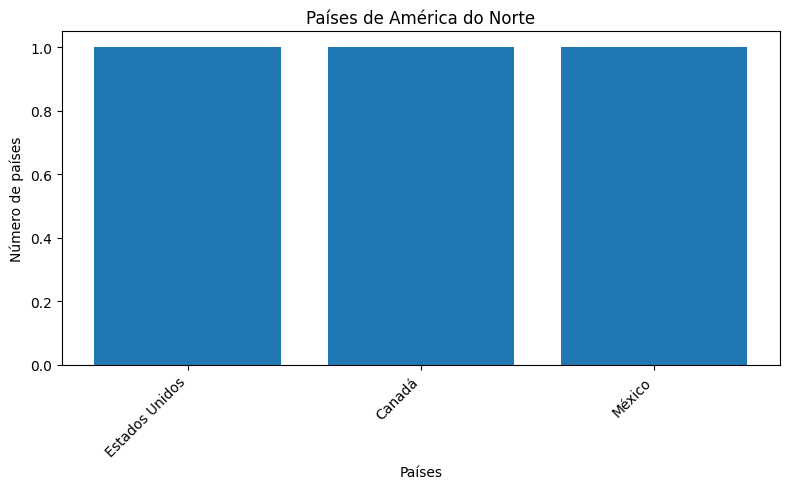

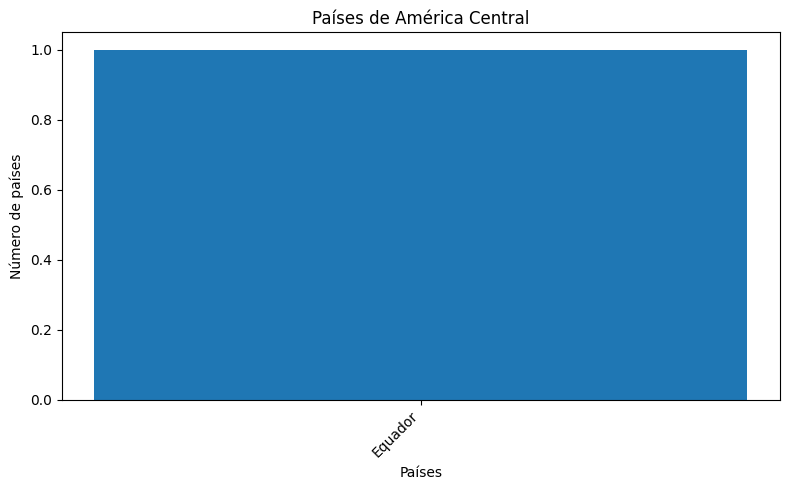

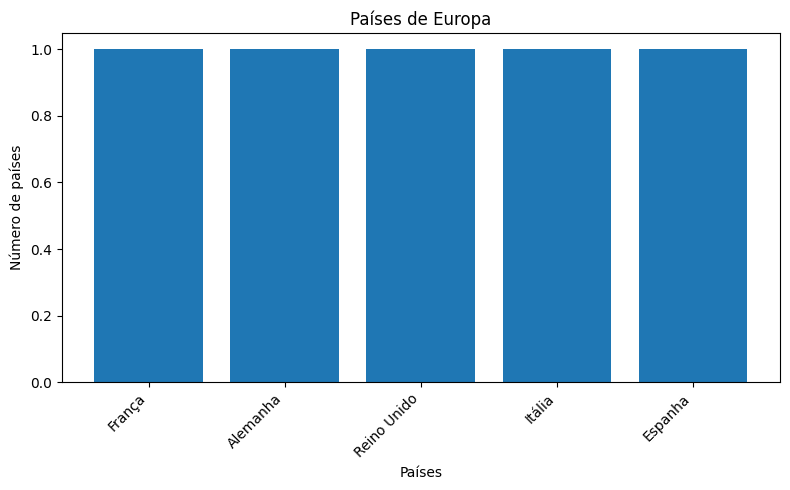

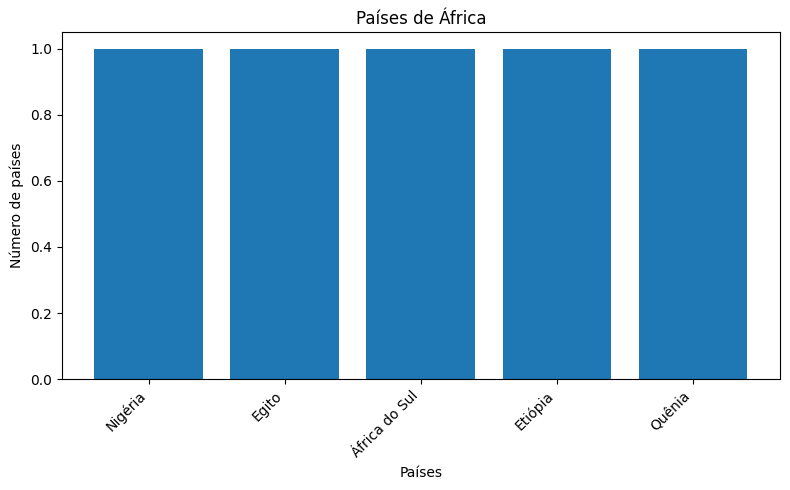

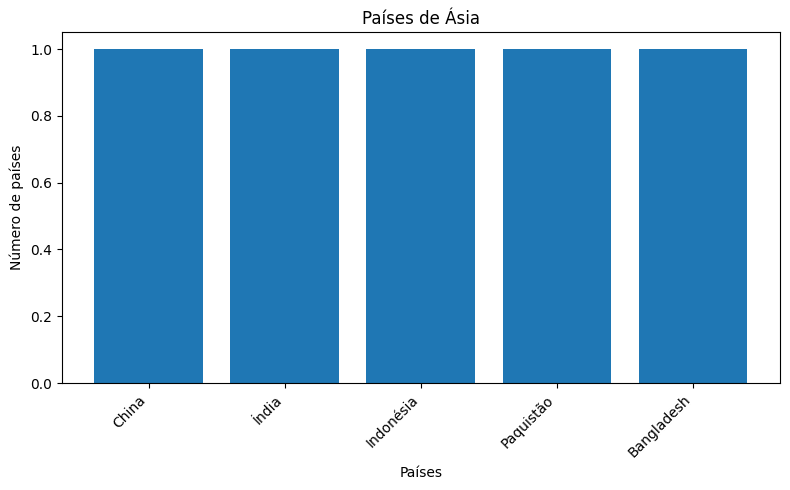

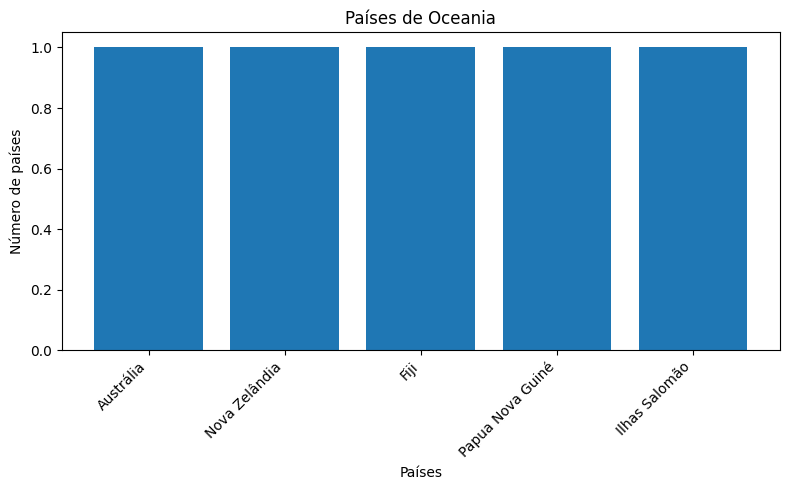

In [559]:
import matplotlib.pyplot as plt

# Criando a lista de listas com os continentes e seus respectivos países/ Precisa inserir todos os países. Quais dados preciso colocar ?
continentes_paises = [
    ["América do Sul", ["Brasil", "Argentina", "Colômbia", "Chile", "Peru"]],
    ["América do Norte", ["Estados Unidos", "Canadá", "México"]],
    ["América Central", ["Equador"]],
    ["Europa", ["França", "Alemanha", "Reino Unido", "Itália", "Espanha"]],
    ["África", ["Nigéria", "Egito", "África do Sul", "Etiópia", "Quênia"]],
    ["Ásia", ["China", "Índia", "Indonésia", "Paquistão", "Bangladesh"]],
    ["Oceania", ["Austrália", "Nova Zelândia", "Fiji", "Papua Nova Guiné", "Ilhas Salomão"]]
]

# Criando um dicionário com o número de países por continente
num_paises_por_continente = {}
for continente, paises in continentes_paises:
    num_paises_por_continente[continente] = len(paises)

# Plotando gráficos de barras para cada continente
for continente, num_paises in num_paises_por_continente.items():
    plt.figure(figsize=(8, 5))
    plt.bar(range(num_paises), [1] * num_paises, align='center', tick_label=continentes_paises[[item[0] for item in continentes_paises].index(continente)][1])
    plt.title(f'Países de {continente}')
    plt.xlabel('Países')
    plt.ylabel('Número de países')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


# **Produção vs Exportação - Malu**

In [560]:
dados_producao.head(1)

# só é necessária a produção de vinhos de mesa, que inclui vinho tinto, branco e rosado

,id,produto,1970,1971,1972,1973,1974,1975,1976,1977,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,1,VINHO DE MESA,217208604,154264651,146953297,116710345,193875345,177401209,144565438,195359778,...,196904222,196173123,210308560,86319015,255015187,218375636,144629737,124200414,173899995,195031611


In [561]:
dados_producao.iloc[0, 2:].T.head()

# selecionando a primeira linha, a partir da terceira coluna

1970    217208604
1971    154264651
1972    146953297
1973    116710345
1974    193875345
Name: 0, dtype: object

<Axes: title={'center': 'Produção de vinho de mesa ao longo dos anos'}, ylabel='Milhões de itros de vinho'>

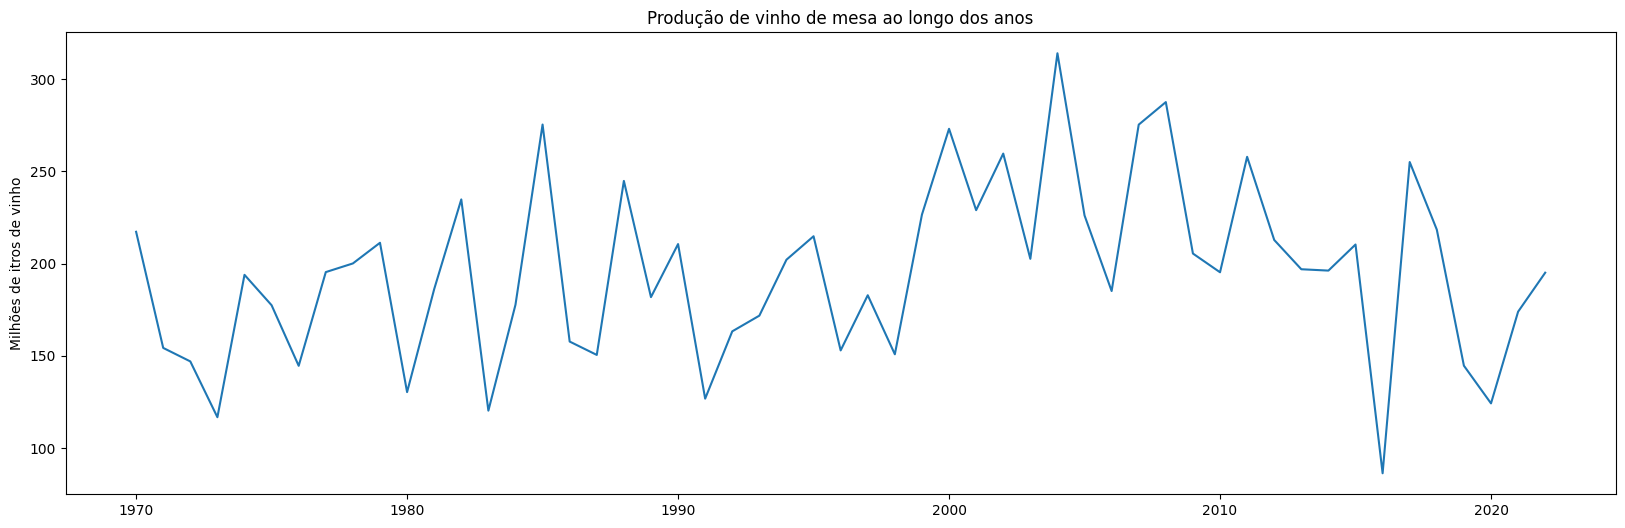

In [562]:
dados_prod = dados_producao.iloc[0, 2:]
dados_producao_milhoes = dados_prod / 1e6
# valores estavam em 1e8, dividi assim para melhorar a visualização

plt.figure(figsize=(20,6))

plt.title("Produção de vinho de mesa ao longo dos anos")
plt.ylabel("Milhões de itros de vinho")

dados_producao_milhoes.T.plot()

In [563]:
dados_exp_vinhos.head()

# Colunas sem .1 são as de quantidade (kg), considerando uma densidade similar da água (1kg = 1L), fica melhor a comparação

,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,...,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1
0,1,Afeganistão,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,11,46,0,0
1,2,África do Sul,0,0,0,0,0,0,0,0,...,0,0,26,95,4,21,0,0,0,0
2,3,"Alemanha, República Democrática",0,0,0,0,4168,2630,12000,8250,...,10794,45382,3660,25467,6261,32605,2698,6741,7630,45367
3,4,Angola,0,0,0,0,0,0,0,0,...,477,709,345,1065,0,0,0,0,4068,4761
4,5,Anguilla,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [564]:
exp_vinhos_quantidade = dados_exp_vinhos.filter(regex='^(?!.*\.1$)')

'''
.filter() é um método do pandas que permite filtrar as colunas ou linhas de um dataframe com base em algum critério.

regex='^(?!.*\.1$)' é um parâmetro do método .filter() que especifica um padrão de expressão regular (regex) que será usado para filtrar as colunas do dataframe.

^ é um âncora que indica o início da string.

(?!.*\.1$) é um lookahead negativo na expressão regular, que é uma técnica usada para fazer correspondências negativas.

.* corresponde a qualquer caractere (.) zero ou mais vezes (*), ou seja, corresponde a qualquer sequência de caracteres.

\.1 corresponde literalmente a .1, ou seja, qualquer sequência que termine com .1.

$: Este é outro âncora que indica o final da string.

Portanto, (?!.*\.1$) significa "não corresponda a qualquer sequência que termine com .1".

'''

'\n.filter() é um método do pandas que permite filtrar as colunas ou linhas de um dataframe com base em algum critério.\n\nregex=\'^(?!.*\\.1$)\' é um parâmetro do método .filter() que especifica um padrão de expressão regular (regex) que será usado para filtrar as colunas do dataframe.\n\n^ é um âncora que indica o início da string.\n\n(?!.*\\.1$) é um lookahead negativo na expressão regular, que é uma técnica usada para fazer correspondências negativas.\n\n.* corresponde a qualquer caractere (.) zero ou mais vezes (*), ou seja, corresponde a qualquer sequência de caracteres.\n\n\\.1 corresponde literalmente a .1, ou seja, qualquer sequência que termine com .1.\n\n$: Este é outro âncora que indica o final da string.\n\nPortanto, (?!.*\\.1$) significa "não corresponda a qualquer sequência que termine com .1".\n\n'

In [565]:
exp_vinhos_quantidade.head()

# faz sentido somar a exportação para todos os países?

,Id,País,1970,1971,1972,1973,1974,1975,1976,1977,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,1,Afeganistão,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,11,0
1,2,África do Sul,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,26,4,0,0
2,3,"Alemanha, República Democrática",0,0,4168,12000,0,0,0,0,...,61699,213348,10680,14012,15467,10794,3660,6261,2698,7630
3,4,Angola,0,0,0,0,0,0,0,0,...,1573,12182,1908,7359,10170,477,345,0,0,4068
4,5,Anguilla,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [566]:
# Removendo as duas primeiras colunas (Id e País)
soma_exp = exp_vinhos_quantidade.iloc[:, 2:]

# Somando todas as linhas
total_quant_exp = soma_exp.sum(axis=0)

ultimos_15anos_exportacao = total_quant_exp.tail(15)

ultimos_15anos_exportacao

2008    10346323
2009    25514198
2010     1280574
2011     1214834
2012     5775376
2013     9149059
2014     2324029
2015     1198479
2016     1786549
2017     2889572
2018     3856162
2019     3152873
2020     4409717
2021     8058704
2022     7025983
dtype: int64

<Axes: title={'center': 'Quantidade de vinho exportado do Brasil nos últimos 15 anos'}, ylabel='Milhões de quilos de vinho'>

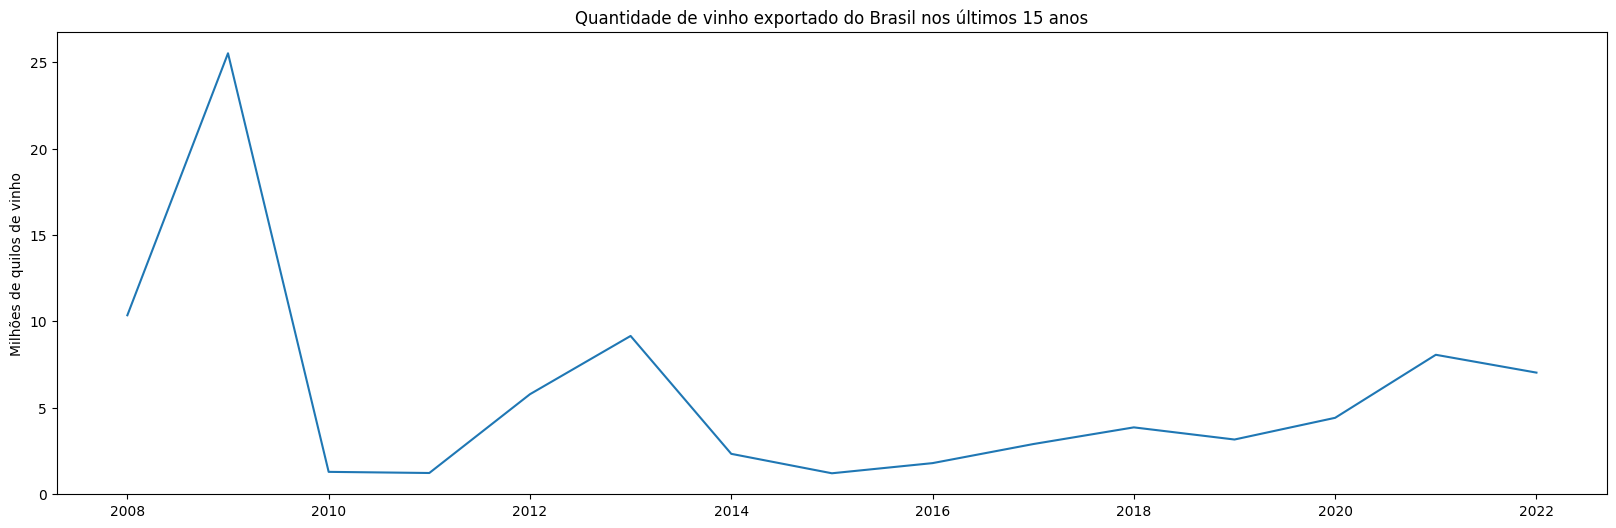

In [567]:
dados_exportacao_milhoes = ultimos_15anos_exportacao / 1e6
# transformando em milhão

plt.figure(figsize=(20,6))

plt.title("Quantidade de vinho exportado do Brasil nos últimos 15 anos")
plt.ylabel("Milhões de quilos de vinho")

dados_exportacao_milhoes.T.plot()

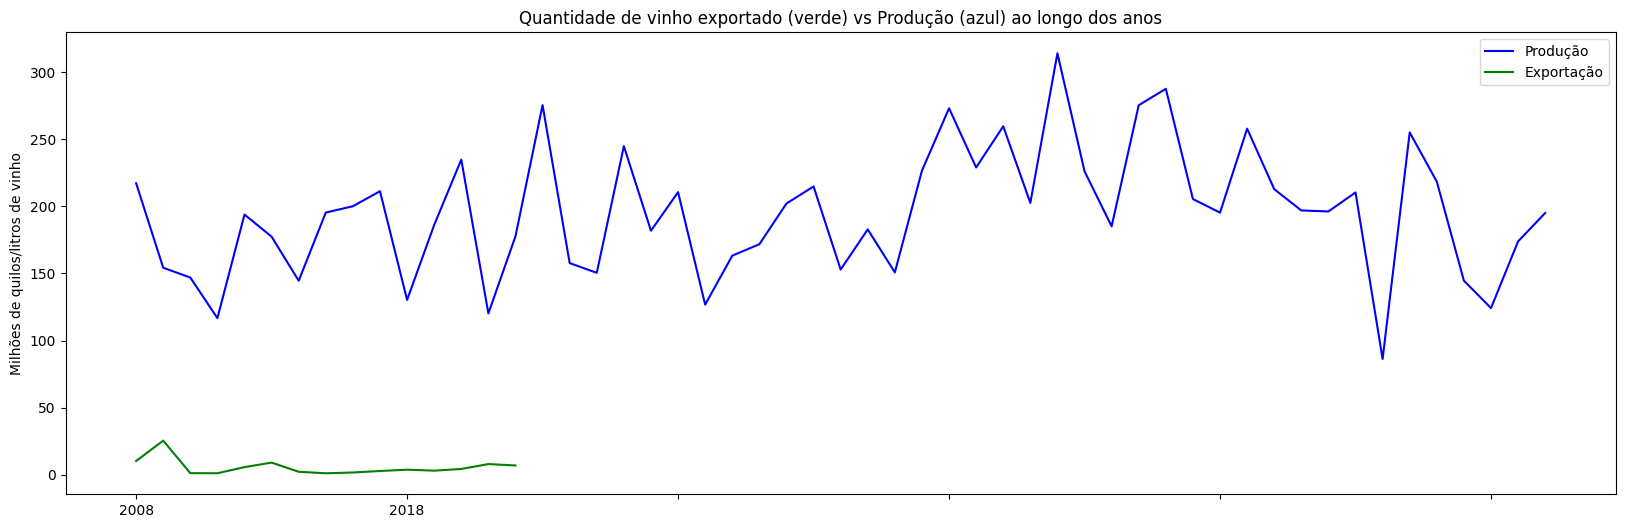

In [568]:
plt.figure(figsize=(20,6))

# Plota os dados de produção com uma linha azul
dados_producao_milhoes.T.plot(color='blue', label='Produção')

# Plota os dados de exportação com uma linha verde
dados_exportacao_milhoes.T.plot(color='green', label='Exportação')

plt.title("Quantidade de vinho exportado (verde) vs Produção (azul) ao longo dos anos")
plt.ylabel("Milhões de quilos/litros de vinho")

# Adiciona legenda
plt.legend()

plt.show()
# a produção é absurdamente maior que a exportação

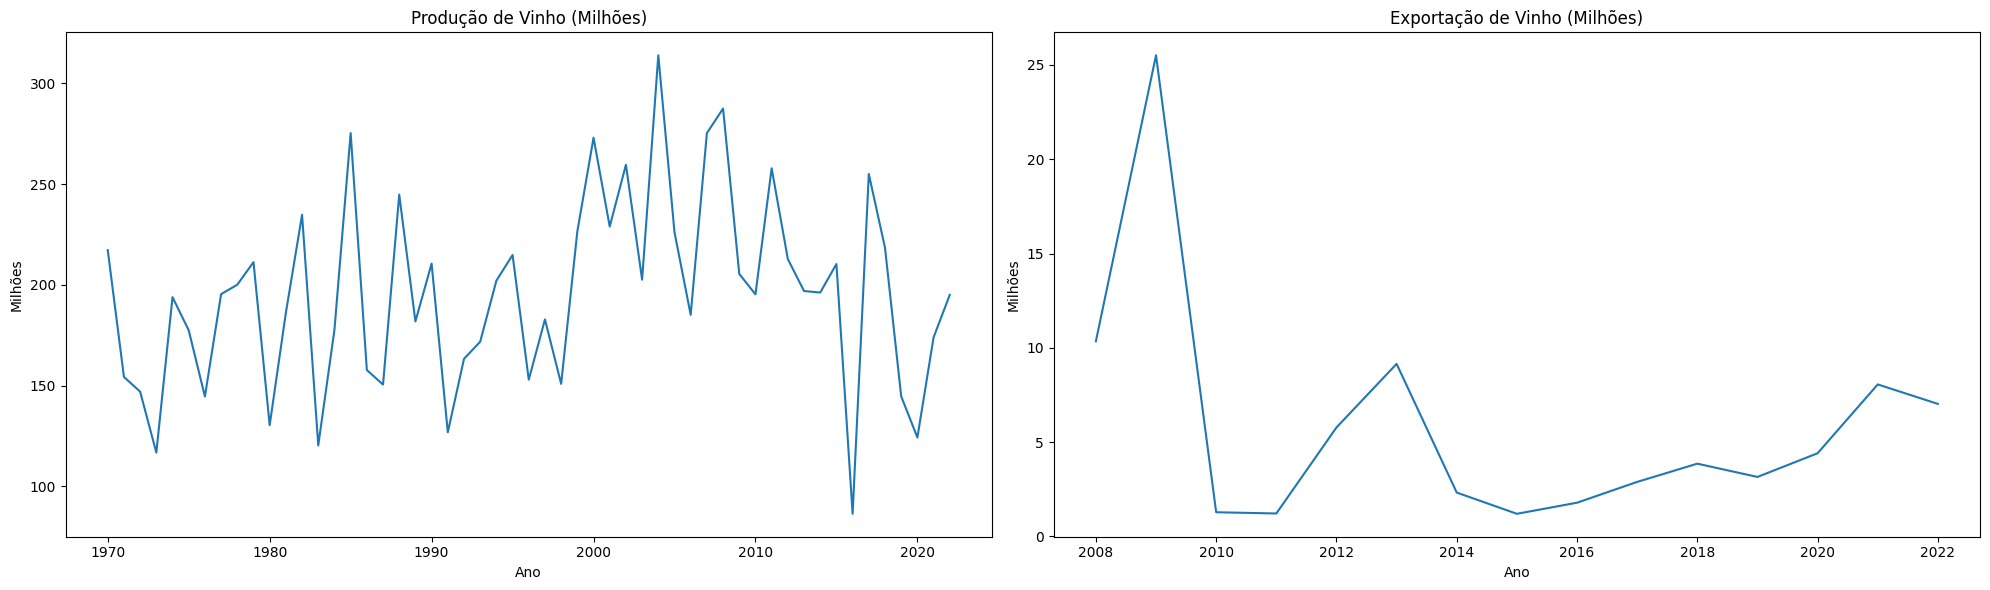

In [569]:
# Criando uma figura e os subplots lado a lado
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

# Plotando o gráfico de produção no primeiro subplot
dados_producao_milhoes.T.plot(ax=axs[0])
axs[0].set_title('Produção de Vinho (Milhões)')
axs[0].set_xlabel('Ano')
axs[0].set_ylabel('Milhões')

# Plotando o gráfico de exportação no segundo subplot
dados_exportacao_milhoes.T.plot(ax=axs[1])
axs[1].set_title('Exportação de Vinho (Milhões)')
axs[1].set_xlabel('Ano')
axs[1].set_ylabel('Milhões')

# Ajustando o layout
plt.tight_layout()

# Exibindo os s

# ***Análise por país - Phaola***

o que diferencia o principal pais com o ultimo? renda? clima? produção propria?

comparar histórico do mesmo país

comparar blocos de datas


In [570]:
# Criação do DF com os dados do último ano
i_anos = [ano for ano in dados_exp_vinhos.columns[2:] if int(ano[:4]) == 2022]
vinho_i = dados_exp_vinhos[['País'] + i_anos].copy()
vinho_i.rename(columns={'País': 'Destino'}, inplace=True)
vinho_i['Origem'] = 'Brasil'
vinho_i.head()

# # Adição do KG e $ no nome das colunas
for coluna in vinho_i.columns[1:]:
    if coluna != 'Origem' and coluna != 'Destino':
        sufixo = '_$' if len(coluna) > 4 else '_kg'
        vinho_i.rename(columns={coluna: coluna + sufixo}, inplace=True)
vinho_i.head()

# Criação dos DataFrames com base nas listas
vinho_i_valor = vinho_i[['Origem', 'Destino'] + [coluna for coluna in vinho_i.columns if coluna.endswith('_$')]].copy()
vinho_i_valor['total'] = vinho_i_valor.iloc[:, 2:].sum(axis=1)
vinho_i_valor = vinho_i_valor[vinho_i_valor['total'] > 0]
vinho_i_valor.head()

vinho_i_quant = vinho_i[['Origem', 'Destino'] + [coluna for coluna in vinho_i.columns if coluna.endswith('_kg')]].copy()
vinho_i_quant['total'] = vinho_i_quant.iloc[:, 2:].sum(axis=1)
vinho_i_quant = vinho_i_quant[vinho_i_quant['total'] > 0]
vinho_i_quant.head()

# Criação DF conciso
expo_valor = vinho_i_valor[['Origem', 'Destino', 'total']].copy()
expo_valor['total'] = expo_valor['total'].astype(int)
expo_valor = expo_valor.sort_values(by='total', ascending=False)
expo_valor['Posição'] = expo_valor.index.astype(str)
expo_valor.head()

expo_quant = vinho_i_quant[['Origem', 'Destino', 'total']].copy()
expo_quant['total'] = expo_quant['total'].astype(int)
expo_quant = expo_quant.sort_values(by='total', ascending=False)
expo_quant['Posição'] = expo_quant.index.astype(str)
expo_quant.head()

# Juntando os DataFrames expo_quant e expo_valor
dados_i = pd.merge(expo_quant, expo_valor, on=['Destino', 'Origem'], suffixes=('_quantidade', '_valor'))
dados_i.rename(columns={'total_quantidade': 'Quantidade', 'total_valor': 'Valor'}, inplace=True)
dados_i = dados_i[['Origem', 'Destino', 'Quantidade', 'Valor']]


In [571]:
# Principais paises
dados_i.head()

,Origem,Destino,Quantidade,Valor
0,Brasil,Paraguai,5076670,7156293
1,Brasil,Uruguai,637117,997367
2,Brasil,Haiti,553503,741014
3,Brasil,Estados Unidos,220373,447893
4,Brasil,China,105395,404647


In [572]:
# Ultimos países
dados_i.tail()

,Origem,Destino,Quantidade,Valor
71,Brasil,Áustria,6,212
72,Brasil,México,6,33
73,Brasil,Suécia,5,18
74,Brasil,Bulgária,5,31
75,Brasil,Dinamarca,2,6


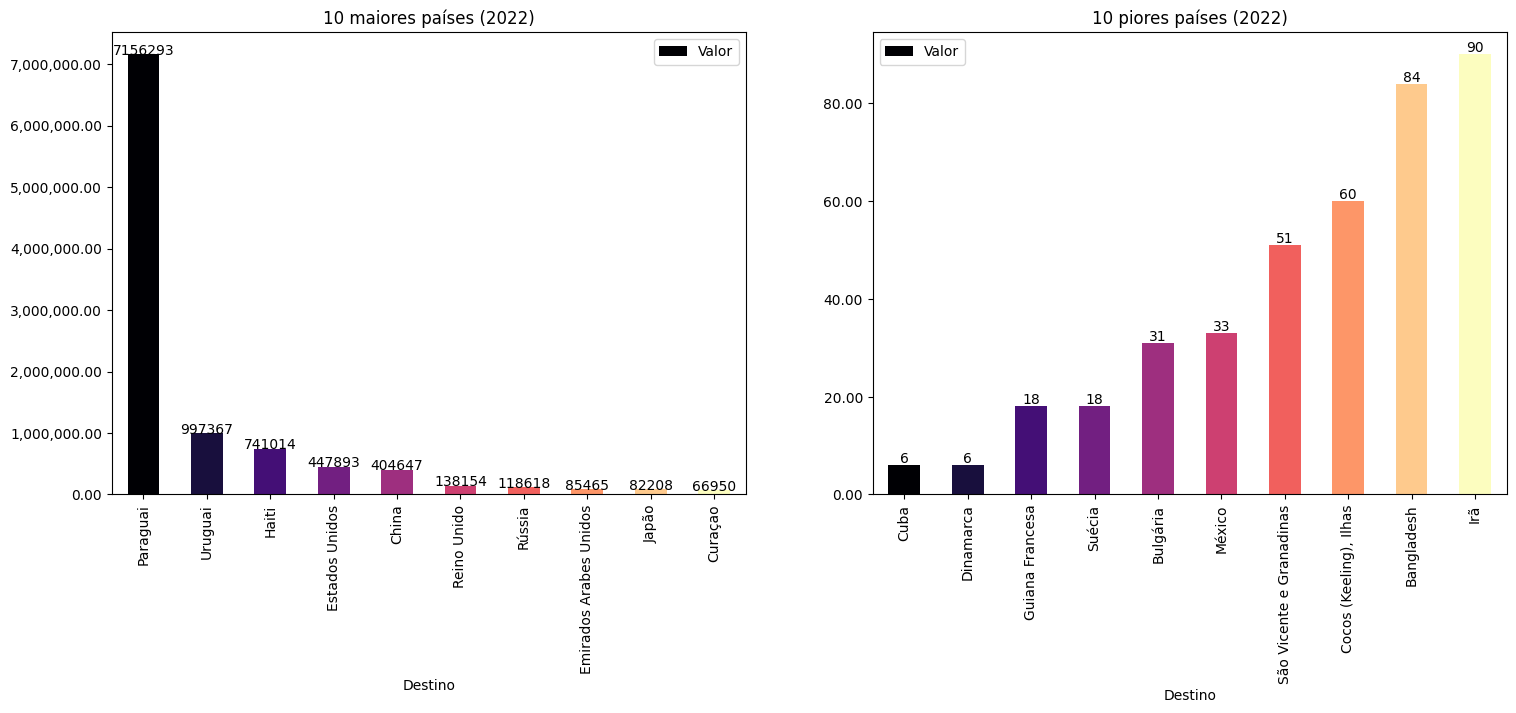

In [573]:
import numpy as np
import matplotlib.ticker as ticker

# Criando uma figura e uma grade de subplots com 1 linha e 2 colunas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Filtrando os 10 maiores
top10_i = dados_i.nlargest(10, 'Valor')
cores_gradientes1 = plt.cm.magma(np.linspace(0, 1, len(top10_i)))  # Gerando cores gradientes
top10_i.plot(x= "Destino", y="Valor", kind="bar", ax=ax1, color=cores_gradientes1)

# Adicionando o valor em cima da barra
for index, value in enumerate(top10_i['Valor']):
    ax1.text(index, value + 0.5, str(value), ha='center')

ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax1.set_title("10 maiores países (2022)")

# Filtrando os 10 piores
top10piores_i = dados_i.nsmallest(10, 'Valor')
cores_gradientes2 = plt.cm.magma(np.linspace(0, 1, len(top10piores_i)))  # Gerando cores gradientes
top10piores_i.plot(x= "Destino", y="Valor", kind="bar", ax=ax2, color=cores_gradientes2)

# Adicionando o valor em cima da barra
for index, value in enumerate(top10piores_i['Valor']):
    ax2.text(index, value + 0.5, str(value), ha='center')

ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax2.set_title("10 piores países (2022)")

# Exibindo a figura
plt.show()


Cuba importa vinho do Brasil, embora não em grande quantidade em comparação com outros países produtores de vinho. O comércio de vinho entre Cuba e o Brasil existe, mas pode ser limitado devido a vários fatores, incluindo restrições comerciais, logísticas e preferências do consumidor.As quantidades de vinho brasileiro importadas por Cuba podem não ser tão significativas em comparação com outras fontes de importação devido a fatores como preferências de sabor, disponibilidade de produtos e preços competitivos.

Cuba importa a maior parte de seu vinho principalmente de países produtores tradicionais e renomados, como Espanha, França, Itália e Chile. Esses países têm uma longa história de produção vinícola e uma ampla variedade de vinhos disponíveis para exportação em todo o mundo.

Além dos países mencionados, Cuba também pode importar vinho de outras regiões vinícolas, dependendo da disponibilidade, preferências do consumidor e acordos comerciais. Por exemplo, vinhos de Portugal, Argentina, Estados Unidos e Alemanha também podem ser encontrados no mercado cubano, embora em menor quantidade em comparação com os principais exportadores mencionados anteriormente.



---


Cuba e Paraguai são países com contextos econômicos, políticos e sociais bastante distintos, o que influencia suas relações comerciais, incluindo a importação de vinho do Brasil. Aqui estão algumas das principais diferenças entre Cuba e Paraguai nesse contexto:

1. Estrutura Econômica e Poder de Compra: Cuba possui uma economia centralizada e altamente controlada pelo Estado, enquanto o Paraguai tem uma economia mais aberta e orientada para o mercado. Isso afeta o poder de compra e a demanda por produtos importados, como vinho. Cuba, com seu modelo econômico centralizado, pode ter uma demanda mais limitada por produtos estrangeiros devido a restrições financeiras e controles governamentais. Por outro lado, o Paraguai, com uma economia mais aberta, pode ter uma demanda relativamente maior por vinho importado.

2. Relações Diplomáticas e Comerciais com o Brasil: As relações diplomáticas e comerciais entre Cuba e o Brasil são historicamente mais estáveis do que as entre o Paraguai e o Brasil. Cuba e Brasil mantêm relações diplomáticas desde 1942 e têm cooperação em várias áreas. Isso pode facilitar o comércio bilateral, incluindo a importação de vinho brasileiro por Cuba. No caso do Paraguai, embora tenha relações diplomáticas com o Brasil, as tensões políticas podem afetar as relações comerciais e a importação de vinho.

3. Perfil de Consumo e Preferências: Os hábitos de consumo e as preferências dos consumidores em relação ao vinho podem variar entre Cuba e Paraguai devido a diferenças culturais, sociais e econômicas. Por exemplo, Cuba tem uma cultura gastronômica influenciada pela culinária espanhola e caribenha, o que pode afetar as preferências de vinho. No Paraguai, o consumo de vinho pode ser influenciado por fatores como a proximidade com grandes produtores de vinho, como Argentina e Chile, e a imigração europeia.

Em resumo, embora tanto Cuba quanto Paraguai possam importar vinho do Brasil, as diferenças em suas estruturas econômicas, relações diplomáticas e preferências de consumo podem resultar em volumes e padrões de importação diferentes entre os dois países.


---


Existem algumas medidas que podem ser consideradas para incentivar a importação de vinhos brasileiros em Cuba:


- Promoção e Marketing: Investir em campanhas de promoção e marketing para aumentar a conscientização sobre os vinhos brasileiros em Cuba. Isso pode incluir participação em feiras comerciais, eventos de degustação e publicidade direcionada aos consumidores cubanos.
- Educação sobre Vinhos Brasileiros: Oferecer programas de educação sobre vinhos brasileiros para importadores, distribuidores e consumidores em Cuba. Isso pode ajudar a aumentar o conhecimento sobre a qualidade e a variedade dos vinhos produzidos no Brasil.
- Negociação de Acordos Comerciais: Buscar a negociação de acordos comerciais entre o Brasil e Cuba que facilitem o comércio de vinhos, reduzindo tarifas e barreiras comerciais.
- Parcerias Estratégicas: Estabelecer parcerias estratégicas com empresas locais em Cuba que tenham experiência na importação e distribuição de vinhos. Isso pode ajudar a expandir a presença dos vinhos brasileiros no mercado cubano.
- Customização de Produtos: Adaptar os vinhos brasileiros às preferências do mercado cubano, seja criando produtos específicos ou oferecendo variedades que atendam aos gostos locais.
- Apoio Governamental: Receber apoio do governo brasileiro para incentivar a exportação de vinhos, seja por meio de incentivos fiscais, programas de apoio à exportação ou assistência técnica.
- Logística Eficiente: Melhorar a logística de exportação para garantir que os vinhos brasileiros cheguem de forma eficiente e competitiva ao mercado cubano, incluindo questões como transporte, armazenamento e distribuição.


O sucesso dessas iniciativas dependerá da colaboração entre produtores, governos e parceiros comerciais em ambos os países.


In [574]:
# Criação do DF com os dados dos últimos 5 anos
v_anos = [ano for ano in dados_exp_vinhos.columns[2:] if int(ano[:4]) >= 2017]
vinho_v = dados_exp_vinhos[['País'] + v_anos].copy()
vinho_v.rename(columns={'País': 'Destino'}, inplace=True)
vinho_v['Origem'] = 'Brasil'
vinho_v.head()

# Adição do KG e $ no nome das colunas
for coluna in vinho_v.columns[1:]:
    if coluna != 'Origem' and coluna != 'Destino':
        sufixo = '_$' if len(coluna) > 4 else '_kg'
        vinho_v.rename(columns={coluna: coluna + sufixo}, inplace=True)
vinho_v.head()

# Criação dos DataFrames com base nas listas
vinho_v_valor = vinho_v[['Origem', 'Destino'] + [coluna for coluna in vinho_v.columns if coluna.endswith('_$')]].copy()
vinho_v_valor['total'] = vinho_v_valor.iloc[:, 2:].sum(axis=1)
vinho_v_valor = vinho_v_valor[vinho_v_valor['total'] > 0]
vinho_v_valor.head()

vinho_v_quant = vinho_v[['Origem', 'Destino'] + [coluna for coluna in vinho_v.columns if coluna.endswith('_kg')]].copy()
vinho_v_quant['total'] = vinho_v_quant.iloc[:, 2:].sum(axis=1)
vinho_v_quant = vinho_v_quant[vinho_v_quant['total'] > 0]
vinho_v_quant.head()

# Criação DF conciso
expo_valor = vinho_v_valor[['Origem', 'Destino', 'total']].copy()
expo_valor['total'] = expo_valor['total'].astype(int)
expo_valor = expo_valor.sort_values(by='total', ascending=False)
expo_valor['Posição'] = expo_valor.index.astype(str)
expo_valor.head()

expo_quant = vinho_v_quant[['Origem', 'Destino', 'total']].copy()
expo_quant['total'] = expo_quant['total'].astype(int)
expo_quant = expo_quant.sort_values(by='total', ascending=False)
expo_quant['Posição'] = expo_quant.index.astype(str)
expo_quant.head()

# Juntando os DataFrames expo_quant e expo_valor
dados_v = pd.merge(expo_quant, expo_valor, on=['Destino', 'Origem'], suffixes=('_quantidade', '_valor'))
dados_v.rename(columns={'total_quantidade': 'Quantidade', 'total_valor': 'Valor'}, inplace=True)
dados_v = dados_v[['Origem', 'Destino', 'Quantidade', 'Valor']]
dados_v.head()


,Origem,Destino,Quantidade,Valor
0,Brasil,Paraguai,22945383,31813456
1,Brasil,Haiti,1784383,2317575
2,Brasil,Estados Unidos,1143198,3914732
3,Brasil,Uruguai,787782,1195323
4,Brasil,China,517813,1801013


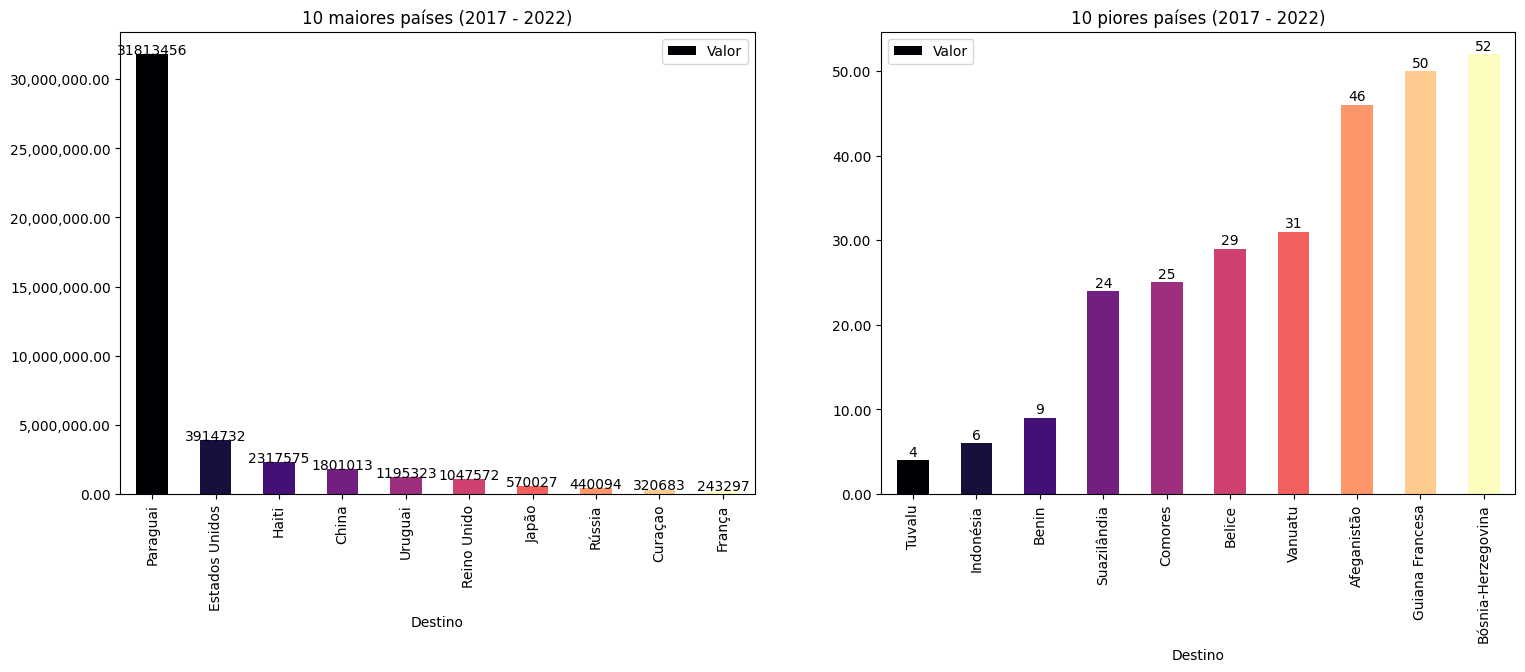

In [575]:
import numpy as np

# Criando uma figura e uma grade de subplots com 1 linha e 2 colunas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Filtrando os 10 maiores
top10 = dados_v.nlargest(10, 'Valor')
cores_gradientes1 = plt.cm.magma(np.linspace(0, 1, len(top10)))  # Gerando cores gradientes
top10.plot(x= "Destino", y="Valor", kind="bar", ax=ax1, color=cores_gradientes1)

# Adicionando o valor em cima da barra
for index, value in enumerate(top10['Valor']):
    ax1.text(index, value + 0.5, str(value), ha='center')

ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax1.set_title("10 maiores países (2017 - 2022)")

# Filtrando os 10 piores
top10piores = dados_v.nsmallest(10, 'Valor')
cores_gradientes2 = plt.cm.magma(np.linspace(0, 1, len(top10piores)))  # Gerando cores gradientes
top10piores.plot(x= "Destino", y="Valor", kind="bar", ax=ax2, color=cores_gradientes2)

# Adicionando o valor em cima da barra
for index, value in enumerate(top10piores['Valor']):
    ax2.text(index, value + 0.5, str(value), ha='center')

ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax2.set_title("10 piores países (2017 - 2022)")

# Exibindo a figura
plt.show()

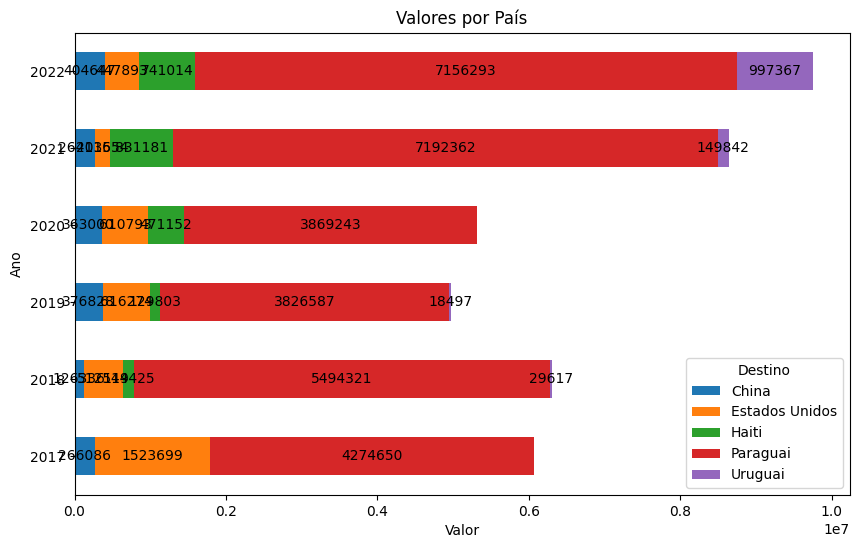

In [576]:
# Ordenando os países pelo valor de importação
paises_ordenados = vinho_v_valor.groupby('Destino')['total'].sum().sort_values()

# Selecionando os primeiros melhores países
pais_desejado = paises_ordenados.tail(5).index.tolist()

# Filtrando os dados dos países desejados
dados_pais = vinho_v_valor[vinho_v_valor['Destino'].isin(pais_desejado)].filter(regex='^(?!.*\.1$)')
dados_pais.head()

df_transformado = dados_pais.melt(id_vars=['Origem', 'Destino'], var_name='Ano', value_name='Valor')

# Removendo os caracteres a mais alem do ano
df_transformado['Ano'] = df_transformado['Ano'].str.split('.').str[0]

# Transformando o campo em data
df_transformado['Data'] = pd.to_datetime(df_transformado['Ano'], format='%Y', errors='coerce')

df_transformado.head(30)

# Agrupando os valores por ano e destino e calculando a soma dos valores
dados_agrupados = df_transformado.groupby(['Data', 'Destino'])['Valor'].sum().unstack()

# Plotando o gráfico de barras horizontais empilhadas
ax = dados_agrupados.plot(kind='barh', stacked=True, figsize=(10, 6))

# Adicionando os valores dentro das barras
for p in ax.patches:
    if p.get_width() > 0:  # Verifica se a largura da barra é maior que zero
        ax.annotate(str(int(p.get_width())), (p.get_x() + p.get_width() / 2., p.get_y() + p.get_height() / 2.), ha='center', va='center', xytext=(0, 0), textcoords='offset points')

# Formatando o eixo Y para mostrar apenas o ano
years = dados_agrupados.index.strftime('%Y')
plt.yticks(range(len(years)), years)

# Adicionando títulos aos eixos e ao gráfico
plt.title('Valores por País')
plt.xlabel('Valor')
plt.ylabel('Ano')

# Exibindo o gráfico
plt.show()


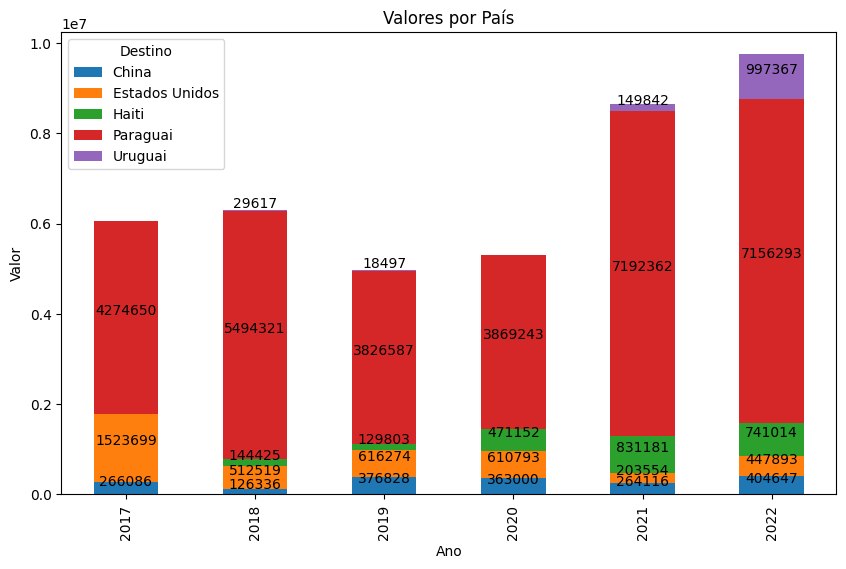

In [577]:
# Ordenando os países pelo valor de importação
paises_ordenados = vinho_v_valor.groupby('Destino')['total'].sum().sort_values()

# Selecionando os primeiros melhores países
pais_desejado = paises_ordenados.tail(5).index.tolist()

# Filtrando os dados dos países desejados
dados_pais = vinho_v_valor[vinho_v_valor['Destino'].isin(pais_desejado)].filter(regex='^(?!.*\.1$)')
dados_pais.head()

df_transformado = dados_pais.melt(id_vars=['Origem', 'Destino'], var_name='Ano', value_name='Valor')

# Removendo os caracteres a mais alem do ano
df_transformado['Ano'] = df_transformado['Ano'].str.split('.').str[0]

# Transformando o campo em data
df_transformado['Data'] = pd.to_datetime(df_transformado['Ano'], format='%Y', errors='coerce')

df_transformado.head(30)

# Agrupando os valores por ano e destino e calculando a soma dos valores
dados_agrupados = df_transformado.groupby(['Data', 'Destino'])['Valor'].sum().unstack()

# Plotando o gráfico de barras verticais empilhadas
ax = dados_agrupados.plot(kind='bar', stacked=True, figsize=(10, 6))

# Adicionando os valores dentro das barras
for p in ax.patches:
    if p.get_height() > 0:  # Verifica se a altura da barra é maior que zero
        bar_width = p.get_width()
        bar_height = p.get_height()
        bar_x = p.get_x()
        bar_y = p.get_y()

        # Verificando se há espaço suficiente para adicionar o rótulo
        if bar_height > 3:  # ajuste este valor conforme necessário
            ax.annotate(str(int(bar_height)), (bar_x + bar_width / 2., bar_y + bar_height / 2.), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Formatando o eixo X para mostrar apenas o ano
years = dados_agrupados.index.strftime('%Y')
plt.xticks(range(len(years)), years)

# Adicionando títulos aos eixos e ao gráfico
plt.title('Valores por País')
plt.xlabel('Ano')
plt.ylabel('Valor')

# Exibindo o gráfico
plt.show()

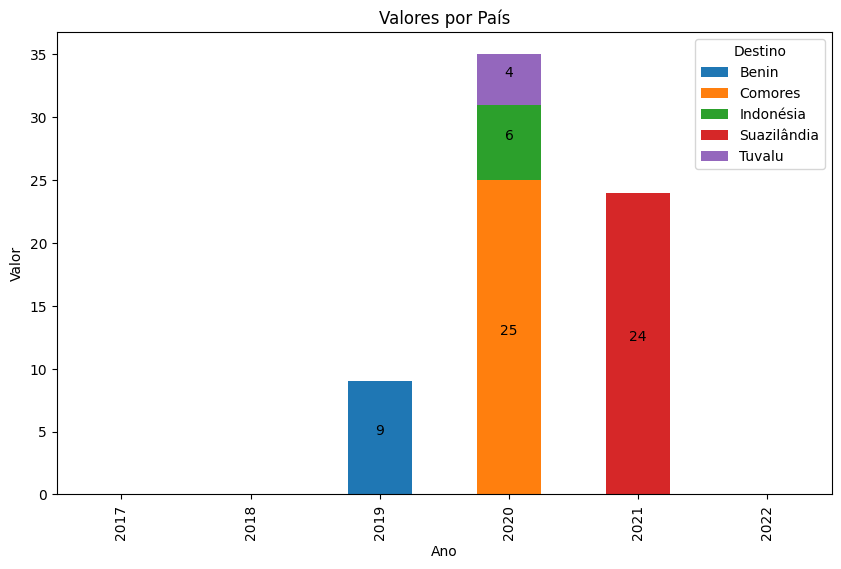

In [578]:
# Ordenando os países pelo valor de importação
paises_ordenados = vinho_v_valor.groupby('Destino')['total'].sum().sort_values()

# Selecionando os ultimos melhores países
pais_desejado = paises_ordenados.head(5).index.tolist()

# Filtrando os dados dos países desejados
dados_pais = vinho_v_valor[vinho_v_valor['Destino'].isin(pais_desejado)].filter(regex='^(?!.*\.1$)')
dados_pais.head()

df_transformado = dados_pais.melt(id_vars=['Origem', 'Destino'], var_name='Ano', value_name='Valor')

# Removendo os caracteres a mais alem do ano
df_transformado['Ano'] = df_transformado['Ano'].str.split('.').str[0]

# Transformando o campo em data
df_transformado['Data'] = pd.to_datetime(df_transformado['Ano'], format='%Y', errors='coerce')

df_transformado.head(30)

# Agrupando os valores por ano e destino e calculando a soma dos valores
dados_agrupados = df_transformado.groupby(['Data', 'Destino'])['Valor'].sum().unstack()

# Plotando o gráfico de barras verticais empilhadas
ax = dados_agrupados.plot(kind='bar', stacked=True, figsize=(10, 6))

# Adicionando os valores dentro das barras
for p in ax.patches:
    if p.get_height() > 0:  # Verifica se a altura da barra é maior que zero
        bar_width = p.get_width()
        bar_height = p.get_height()
        bar_x = p.get_x()
        bar_y = p.get_y()

        # Verificando se há espaço suficiente para adicionar o rótulo
        if bar_height > 3:  # ajuste este valor conforme necessário
            ax.annotate(str(int(bar_height)), (bar_x + bar_width / 2., bar_y + bar_height / 2.), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Formatando o eixo X para mostrar apenas o ano
years = dados_agrupados.index.strftime('%Y')
plt.xticks(range(len(years)), years)

# Adicionando títulos aos eixos e ao gráfico
plt.title('Valores por País')
plt.xlabel('Ano')
plt.ylabel('Valor')

# Exibindo o gráfico
plt.show()

In [579]:
# Criação do DF com os dados gerais
v_anos = [ano for ano in dados_exp_vinhos.columns[2:] if int(ano[:4]) >= 1970]
vinho_v = dados_exp_vinhos[['País'] + v_anos].copy()
vinho_v.rename(columns={'País': 'Destino'}, inplace=True)
vinho_v['Origem'] = 'Brasil'
vinho_v.head()

# Adição do KG e $ no nome das colunas
for coluna in vinho_v.columns[1:]:
    if coluna != 'Origem' and coluna != 'Destino':
        sufixo = '_$' if len(coluna) > 4 else '_kg'
        vinho_v.rename(columns={coluna: coluna + sufixo}, inplace=True)
vinho_v.head()

# Criação dos DataFrames com base nas listas
vinho_v_valor = vinho_v[['Origem', 'Destino'] + [coluna for coluna in vinho_v.columns if coluna.endswith('_$')]].copy()
vinho_v_valor['total'] = vinho_v_valor.iloc[:, 2:].sum(axis=1)
vinho_v_valor = vinho_v_valor[vinho_v_valor['total'] > 0]
vinho_v_valor.head()

vinho_v_quant = vinho_v[['Origem', 'Destino'] + [coluna for coluna in vinho_v.columns if coluna.endswith('_kg')]].copy()
vinho_v_quant['total'] = vinho_v_quant.iloc[:, 2:].sum(axis=1)
vinho_v_quant = vinho_v_quant[vinho_v_quant['total'] > 0]
vinho_v_quant.head()

# Criação DF conciso
expo_valor = vinho_v_valor[['Origem', 'Destino', 'total']].copy()
expo_valor['total'] = expo_valor['total'].astype(int)
expo_valor = expo_valor.sort_values(by='total', ascending=False)
expo_valor['Posição'] = expo_valor.index.astype(str)
expo_valor.head()

expo_quant = vinho_v_quant[['Origem', 'Destino', 'total']].copy()
expo_quant['total'] = expo_quant['total'].astype(int)
expo_quant = expo_quant.sort_values(by='total', ascending=False)
expo_quant['Posição'] = expo_quant.index.astype(str)
expo_quant.head()

# Juntando os DataFrames expo_quant e expo_valor
dados_v = pd.merge(expo_quant, expo_valor, on=['Destino', 'Origem'], suffixes=('_quantidade', '_valor'))
dados_v.rename(columns={'total_quantidade': 'Quantidade', 'total_valor': 'Valor'}, inplace=True)
dados_v = dados_v[['Origem', 'Destino', 'Quantidade', 'Valor']]
dados_v.head(10)

,Origem,Destino,Quantidade,Valor
0,Brasil,Paraguai,115543747,85606168
1,Brasil,Estados Unidos,55258958,71504688
2,Brasil,Rússia,39808014,25914397
3,Brasil,Japão,8198936,7043882
4,Brasil,Angola,5819857,4859836
5,Brasil,Reino Unido,3452430,8317001
6,Brasil,China,2517500,4778033
7,Brasil,Espanha,2015003,3867723
8,Brasil,Haiti,1796653,2333023
9,Brasil,Países Baixos,1503456,4287747


In [580]:
países = dados_v["Destino"]

países

0            Paraguai
1      Estados Unidos
2              Rússia
3               Japão
4              Angola
            ...      
123       Suazilândia
124           Comores
125        Mauritânia
126         Indonésia
127            Tuvalu
Name: Destino, Length: 128, dtype: object

In [581]:
dados_v['Destino']

0            Paraguai
1      Estados Unidos
2              Rússia
3               Japão
4              Angola
            ...      
123       Suazilândia
124           Comores
125        Mauritânia
126         Indonésia
127            Tuvalu
Name: Destino, Length: 128, dtype: object

In [582]:
continents = {
    'África': ['África do Sul', 'Angola', 'Benin', 'Cabo Verde', 'Camarões', 'Comores', 'Congo', 'Costa do Marfim', 'Gana', 'Catar', 'Tunísia', 'Guine Bissau', 'Guine Equatorial', 'Libéria', 'Mauritânia', 'Moçambique', 'Namibia', 'Nigéria', 'Nova Caledônia', 'Quênia', 'São Tomé e Príncipe', 'Senegal', 'Serra Leoa', 'Suazilândia', 'Tanzânia', 'Togo'],
    'América do Norte': ['Anguilla', 'Antígua e Barbuda', 'Bahamas', 'Barbados', 'Nicaragua', 'Canadá', 'Cayman, Ilhas', 'Belice', 'Aruba', 'Costa Rica', 'Cuba', 'Curaçao', 'Dominica', 'El Salvador', 'Estados Unidos', 'Granada', 'Guatemala', 'Haiti', 'Honduras', 'Ilhas Virgens', 'Jamaica', 'México', 'Panamá', 'Porto Rico', 'República Dominicana', 'São Vicente e Granadinas','Trinidade Tobago'],
    'América do Sul': ['Argentina', 'Bolívia', 'Brasil', 'Chile', 'Colômbia', 'Equador', 'Guiana', 'Guiana Francesa', 'Paraguai', 'Peru', 'Suriname', 'Uruguai', 'Venezuela'],
    'Ásia': ['Afeganistão', 'Emirados Arabes Unidos', 'Singapura','Bangladesh', 'China', 'Barein', 'Chipre', 'Coreia, Republica Sul', 'Cingapura', 'Filipinas', 'Hong Kong', 'India', 'Indonésia', 'Irã', 'Iraque', 'Japão', 'Jordânia', 'Líbano', 'Malásia', 'Omã', 'Tailândia', 'Taiwan (FORMOSA)', 'Turquia', 'Vietnã'],
    'Europa': ['Alemanha, República Democrática', 'Áustria', 'Bélgica', 'Bósnia-Herzegovina', 'Gibraltar', 'Bulgária', 'Países Baixos', 'Croácia', 'Dinamarca', 'Eslovaca, Republica', 'Espanha', 'Estônia', 'Finlândia', 'França', 'Grécia', 'Antilhas Holandesas', 'Hungria', 'Irlanda', 'Itália', 'Letônia', 'Luxemburgo', 'Malta', 'Montenegro', 'Noruega', 'Polônia', 'Portugal', 'Reino Unido', 'Tcheca, República', 'Rússia', 'Suécia', 'Suíça'],
    'Oceania': ['Austrália', 'Ilha de Man', 'Marshall, Ilhas', 'Nova Zelândia', 'Tuvalu', 'Vanuatu', 'Cocos (Keeling), Ilhas']
    }

In [583]:
# Lista de todos os países nos dados_v
paises_dados_v = set(dados_v['Destino'])

# Encontrar países presentes na lista continents que não estão em paises_dados_v
paises_faltantes = {}
for continente, paises in continents.items():
    paises_faltantes[continente] = [pais for pais in paises if pais not in paises_dados_v]

# Exibir países ausentes por continente
for continente, paises in paises_faltantes.items():
    print(f"Países ausentes na base de dados em {continente}:")
    print(paises)
    print()

Países ausentes na base de dados em África:
[]

Países ausentes na base de dados em América do Norte:
[]

Países ausentes na base de dados em América do Sul:
[]

Países ausentes na base de dados em Ásia:
[]

Países ausentes na base de dados em Europa:
[]

Países ausentes na base de dados em Oceania:
[]



In [584]:
# Lista de todos os países na base de dados dados_v
paises_dados_v = set(dados_v['Destino'])

# Lista de todos os países nos continentes
paises_continents = set()
for paises in continents.values():
    paises_continents.update(paises)

# Encontrar países presentes na base de dados que não estão nos continentes
paises_ausentes = paises_dados_v - paises_continents

print("Países presentes na base de dados dados_v que não estão nos continentes:")
print(paises_ausentes)

Países presentes na base de dados dados_v que não estão nos continentes:
set()


In [585]:
regiao = dados_v[["Destino", "Valor"]].set_index("Destino").T

regiao

Destino,Paraguai,Estados Unidos,Rússia,Japão,Angola,Reino Unido,China,Espanha,Haiti,Países Baixos,...,"Cocos (Keeling), Ilhas",Nicaragua,Vanuatu,Bangladesh,Afeganistão,Suazilândia,Comores,Mauritânia,Indonésia,Tuvalu
Valor,85606168,71504688,25914397,7043882,4859836,8317001,4778033,3867723,2333023,4287747,...,60,24,31,133,46,24,25,85,6,4


In [586]:
Africa = continents['África']
America_Norte = continents['América do Norte']
America_Sul = continents['América do Sul']
Asia = continents['Ásia']
Europa = continents['Europa']
Oceania = continents['Oceania']

# Usado para identificar os países a mais que não existiam no nosso dataframe (regiao[Variavel])

In [587]:
# verificar se a quantidade de países ta correta após a correção

len(Africa + America_Norte + America_Sul + Asia + Europa + Oceania)

# 118 países, o mesmo número de colunas do df regiao

128

- Fazer as listas de países, fazer subplots usando catplot (de preferência na mesma escala), pros 10 primeiros e pras regiões

------

- Analisar os 10 piores, cultura do país, mercado disponível?

Algo como:

top10piores = dados_v.nsmallest(10, 'Valor')

------

- Relação do Valor total de exportação BR e da Vinicola (Embrapa)

------

- Dados Climaticos, Demograficos, Economicos, Avaliação de vinhos

```
estados = ["Amazonas", "Mato Grosso", "Ceará"]

# tirando a coluna que tem dtype como datetime64 para evitar problemas na soma
por_ano_dos_estados = mensal_aberto.drop(columns=["dia_mes_ano"]).query("uf in @estados").groupby(["uf", "ano"]).sum().reset_index()

```

Fazer algo similar para somar as exportações para cada região



Analisar os 10 piores, cultura do país, mercado disponível? - Phaola

In [588]:
# Ultimos 5 anos
top10piores

,Origem,Destino,Quantidade,Valor
105,Brasil,Tuvalu,2,4
104,Brasil,Indonésia,5,6
100,Brasil,Benin,9,9
98,Brasil,Suazilândia,10,24
102,Brasil,Comores,9,25
101,Brasil,Belice,9,29
94,Brasil,Vanuatu,18,31
97,Brasil,Afeganistão,11,46
83,Brasil,Guiana Francesa,112,50
88,Brasil,Bósnia-Herzegovina,45,52


* **Indonésia**: Embora a Indonésia tenha uma população significativa, o
consumo de vinho no país é relativamente baixo devido a fatores culturais e religiosos. A maioria dos indonésios não consome álcool devido à predominância da religião muçulmana.
* **Nicarágua**: O consumo de vinho na Nicarágua é geralmente baixo em comparação com outros países. A cerveja e os destilados são mais populares entre os nicaraguenses.
* **Suazilândia**: Assim como em muitos outros países africanos, o consumo de vinho na Suazilândia pode ser limitado devido a fatores econômicos e culturais. No entanto, o vinho pode ser consumido por uma pequena parcela da população urbana.
Comores: Como uma nação insular no Oceano Índico, o consumo de vinho nas Comores pode ser limitado, devido tanto a fatores econômicos quanto culturais.
* **Vanuatu**: Vanuatu é um país insular na Oceania. Embora o turismo possa impulsionar o consumo de bebidas alcoólicas no país, o consumo de vinho pode ser relativamente baixo em comparação com outras bebidas alcoólicas.
* **Afeganistão**: Devido a fatores culturais e religiosos, o consumo de álcool, incluindo vinho, é proibido para a grande maioria da população afegã. Portanto, o consumo de vinho no Afeganistão é extremamente baixo.
* **Guiana Francesa**: Como uma região ultramarina da França, a Guiana Francesa pode ter um nível moderado de consumo de vinho, influenciado pela cultura e pelos hábitos alimentares franceses.
* **Bósnia-Herzegovina**: O consumo de vinho na Bósnia e Herzegovina é moderado, mas geralmente menor em comparação com outros países europeus. A cerveja e as bebidas destiladas são mais populares na região.
* **Cocos (Keeling), Ilhas**: Dada a sua pequena população e localização remota, o consumo de vinho nas Ilhas Cocos pode ser limitado.

In [589]:
# Ultimo ano (2022)
top10piores_i

,Origem,Destino,Quantidade,Valor
69,Brasil,Cuba,16,6
75,Brasil,Dinamarca,2,6
67,Brasil,Guiana Francesa,22,18
73,Brasil,Suécia,5,18
74,Brasil,Bulgária,5,31
72,Brasil,México,6,33
68,Brasil,São Vicente e Granadinas,20,51
65,Brasil,"Cocos (Keeling), Ilhas",26,60
70,Brasil,Bangladesh,7,84
62,Brasil,Irã,47,90


* **Cuba**: Cuba possui uma cultura rica e diversificada, e embora não seja amplamente conhecida por sua produção de vinho, é conhecida por suas bebidas tradicionais, como o Mojito e o Daiquiri. O consumo de vinho pode ser relativamente baixo em comparação com outros países devido à popularidade de outras bebidas alcoólicas e ao acesso limitado a vinhos importados.
* **Dinamarca**: A Dinamarca tem uma cena gastronômica vibrante e uma população que aprecia uma variedade de alimentos e bebidas de alta qualidade. O consumo de vinho na Dinamarca tem aumentado nos últimos anos, à medida que os dinamarqueses desenvolvem um interesse crescente por vinhos de diferentes regiões do mundo.
* **Guiana Francesa**: Como território ultramarino da França, a Guiana Francesa pode ter acesso a uma variedade de vinhos franceses de alta qualidade. No entanto, o consumo de vinho pode não ser tão prevalente quanto em outras regiões devido às preferências culturais e à disponibilidade de outras bebidas.
* **Suécia**: A Suécia tem uma cultura gastronômica sofisticada e uma população que aprecia vinhos de qualidade. O consumo de vinho na Suécia tem aumentado, especialmente entre os jovens adultos, e há um interesse crescente por vinhos orgânicos e de produção sustentável.
* **Bulgária**: A Bulgária tem uma longa tradição na produção de vinho, com vinícolas em todo o país produzindo uma variedade de vinhos tintos e brancos. O país é conhecido por seus vinhos de boa qualidade a preços acessíveis, e o consumo interno de vinho é significativo.
* **México**: Embora seja mais conhecido por sua tequila e cerveja, o México também possui uma indústria vinícola em crescimento. O país produz uma variedade de vinhos, incluindo vinho tinto, branco e rosé, com destaque para as regiões vinícolas do Vale de Guadalupe, no estado da Baja California.
* **São Vicente e Granadinas:** Como muitos outros países do Caribe, São Vicente e Granadinas têm uma cultura de bebida que inclui rum e outras bebidas alcoólicas. O consumo de vinho pode ser mais limitado devido à preferência por destilados locais e à disponibilidade limitada de vinhos importados.
* **Cocos (Keeling), Ilhas**: Como um território remoto da Austrália, as Ilhas Cocos podem ter acesso a uma variedade limitada de vinhos importados. O consumo de vinho pode ser mais baixo devido à pequena população e ao isolamento geográfico.
* **Bangladesh**: O consumo de álcool, incluindo vinho, é relativamente baixo em Bangladesh devido a restrições culturais e religiosas. A maioria da população segue a fé muçulmana, que proíbe o consumo de álcool.
* **Irã**: O Irã é um país de maioria muçulmana, onde o consumo de álcool é proibido pela lei islâmica. Como resultado, o consumo de vinho é extremamente limitado e restrito a comunidades não muçulmanas e minorias religiosas.

Vou tentar aqui fazer o gráfico de exportação individual para cada continente

In [590]:
exp_vinhos_quantidade.head()

,Id,País,1970,1971,1972,1973,1974,1975,1976,1977,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,1,Afeganistão,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,11,0
1,2,África do Sul,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,26,4,0,0
2,3,"Alemanha, República Democrática",0,0,4168,12000,0,0,0,0,...,61699,213348,10680,14012,15467,10794,3660,6261,2698,7630
3,4,Angola,0,0,0,0,0,0,0,0,...,1573,12182,1908,7359,10170,477,345,0,0,4068
4,5,Anguilla,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [591]:
import pandas as pd

# Dicionário vazio para armazenar os DataFrames de cada continente
continent_dfs = {}

# Percorre o dicionário continents
for continent, countries in continents.items():
    # Filtra as linhas do DataFrame para incluir apenas os países do continente atual
    continent_df = exp_vinhos_quantidade[exp_vinhos_quantidade['País'].isin(countries)]
    # Adiciona o DataFrame do continente ao dicionário
    continent_dfs[continent] = continent_df

# Agora, continent_dfs contém um DataFrame separado para cada continente
# Você pode acessar os DataFrames individuais usando continent_dfs['Nome_do_Continente']

In [592]:
continent_dfs['África'].head()

,Id,País,1970,1971,1972,1973,1974,1975,1976,1977,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
1,2,África do Sul,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,26,4,0,0
3,4,Angola,0,0,0,0,0,0,0,0,...,1573,12182,1908,7359,10170,477,345,0,0,4068
17,18,Benin,0,0,0,0,0,0,0,0,...,0,0,0,5040,0,0,9,0,0,0
22,23,Cabo Verde,0,0,0,0,0,0,0,0,...,0,0,0,0,0,18,0,0,16,0
23,24,Camarões,0,0,0,0,0,0,0,0,...,0,0,0,0,1749,0,0,0,0,0


In [593]:
continent_dfs['América do Sul'].head()

,Id,País,1970,1971,1972,1973,1974,1975,1976,1977,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
7,8,Argentina,0,0,0,0,0,0,0,0,...,0,20385,0,0,0,15711,0,1015,6,480
18,19,Bolívia,2512,9100,34692,61944,9795,12971,64509,3710,...,19147,12534,10674,13586,9495,21566,0,9900,5850,32530
20,21,Brasil,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,31,2504
27,28,Chile,0,0,0,0,0,0,0,0,...,0,0,0,0,0,11049,0,11,26,2094
32,33,Colômbia,14205,3780,1294,3050,4752,0,0,0,...,8,0,0,0,0,6944,897,15660,12160,8217


In [594]:
continent_dfs['América do Norte'].head()

,Id,País,1970,1971,1972,1973,1974,1975,1976,1977,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
4,5,Anguilla,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,6,Antígua e Barbuda,0,0,0,0,0,0,0,0,...,0,0,0,0,0,37,219,624,805,419
8,9,Aruba,0,0,0,0,0,0,0,0,...,0,450,0,0,0,0,0,0,0,0
11,12,Bahamas,0,0,0,0,0,0,0,0,...,581,0,0,0,0,141,791,1212,1083,1215
13,14,Barbados,0,0,840,10905,7682,6336,8419,8796,...,0,0,0,0,0,0,36,143,216,220


In [595]:
continent_dfs['Europa'].head()

,Id,País,1970,1971,1972,1973,1974,1975,1976,1977,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
2,3,"Alemanha, República Democrática",0,0,4168,12000,0,0,0,0,...,61699,213348,10680,14012,15467,10794,3660,6261,2698,7630
6,7,Antilhas Holandesas,280,4800,3000,0,0,1800,0,0,...,11281,4455,6660,16641,5400,0,0,0,0,0
10,11,Áustria,0,0,0,0,0,0,0,0,...,0,0,0,675,0,0,0,0,0,6
15,16,Bélgica,0,0,0,0,0,0,0,0,...,22461,151320,4473,7200,2790,7497,2498,3166,483,828
19,20,Bósnia-Herzegovina,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,45,0,0


In [596]:
continent_dfs['Oceania'].head()

,Id,País,1970,1971,1972,1973,1974,1975,1976,1977,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
9,10,Austrália,0,0,0,0,0,0,0,0,...,16707,6308,7437,1954,1350,2055,1161,1013,705,1424
31,32,"Cocos (Keeling), Ilhas",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,26
66,67,Ilha de Man,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,28,11,97,165
83,84,"Marshall, Ilhas",0,0,0,0,0,0,0,0,...,0,0,0,0,0,923,7276,6270,8644,7240
93,94,Nova Zelândia,0,0,0,0,0,0,0,0,...,1004,2800,809,504,1678,969,500,95,657,63


In [597]:
continent_dfs['Ásia'].head()

,Id,País,1970,1971,1972,1973,1974,1975,1976,1977,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,1,Afeganistão,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,11,0
12,13,Bangladesh,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,2,7
14,15,Barein,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,482,8,302,979
28,29,China,0,0,0,0,0,0,0,0,...,40929,64040,47609,134106,67594,30835,129852,122253,61884,105395
29,30,Chipre,0,0,0,0,0,0,0,0,...,0,0,0,0,0,279,672,2478,1855,1521


Eu não quero desde 1970, quero só os últimos 15 anos, então:

In [598]:
# Dicionário vazio para armazenar os totais de cada continente
continent_totals = {}

# Percorre o dicionário continent_dfs
for continent, df in continent_dfs.items():
    # Seleciona apenas as últimas 15 colunas
    last_15_years = df.iloc[:, -15:]
    # Soma os valores de todas as linhas para cada ano
    yearly_totals = last_15_years.sum(axis=0)
    # Armazena os totais do continente no dicionário continent_totals
    continent_totals[continent] = yearly_totals

# Agora, continent_totals contém os totais dos últimos 15 anos para cada continente
continent_totals

{'África': 2008     67847
 2009     54996
 2010     45958
 2011     15859
 2012     10195
 2013      4037
 2014     17828
 2015      1908
 2016     12399
 2017     27944
 2018     32672
 2019     40949
 2020     45312
 2021    104057
 2022    108637
 dtype: int64,
 'América do Norte': 2008    466242
 2009    392620
 2010    234843
 2011    345352
 2012    162833
 2013    271278
 2014    298555
 2015    318408
 2016    335524
 2017    214558
 2018    286751
 2019    337771
 2020    761887
 2021    864451
 2022    837656
 dtype: int64,
 'América do Sul': 2008    2196780
 2009     532857
 2010     514576
 2011     271208
 2012     377802
 2013     504045
 2014     554786
 2015     506555
 2016    1000225
 2017    2407333
 2018    3302413
 2019    2440001
 2020    3338640
 2021    6716871
 2022    5786278
 dtype: int64,
 'Ásia': 2008     260632
 2009    1826269
 2010     124361
 2011     164585
 2012     120682
 2013     149696
 2014     202296
 2015      89516
 2016     198427
 2017     1

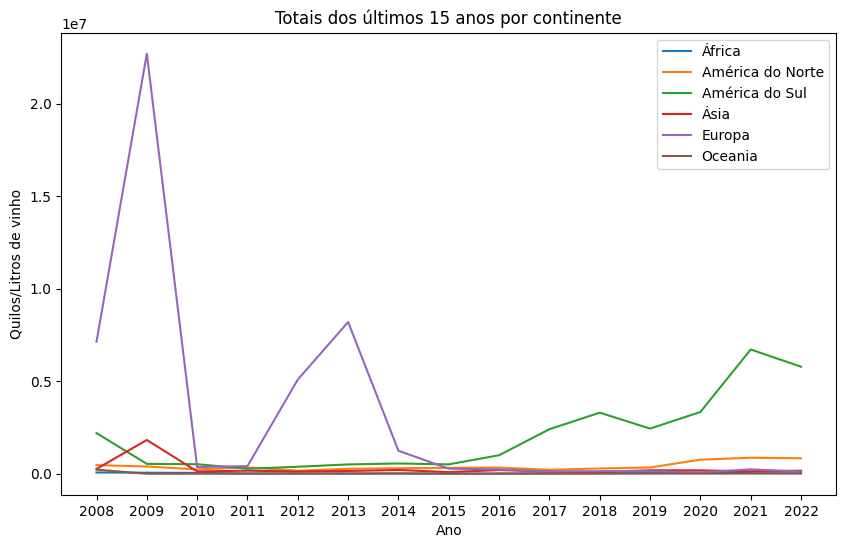

In [599]:
# Configurações do gráfico
plt.figure(figsize=(10, 6))

# Itera sobre o dicionário continent_totals
for continent, totals in continent_totals.items():
    # Plota um gráfico de linha para cada continente
    plt.plot(totals.index, totals.values, label=continent)

# Adiciona título e legendas
plt.title('Totais dos últimos 15 anos por continente')
plt.xlabel('Ano')
plt.ylabel('Quilos/Litros de vinho')
plt.legend()

# Exibe o gráfico
plt.show()

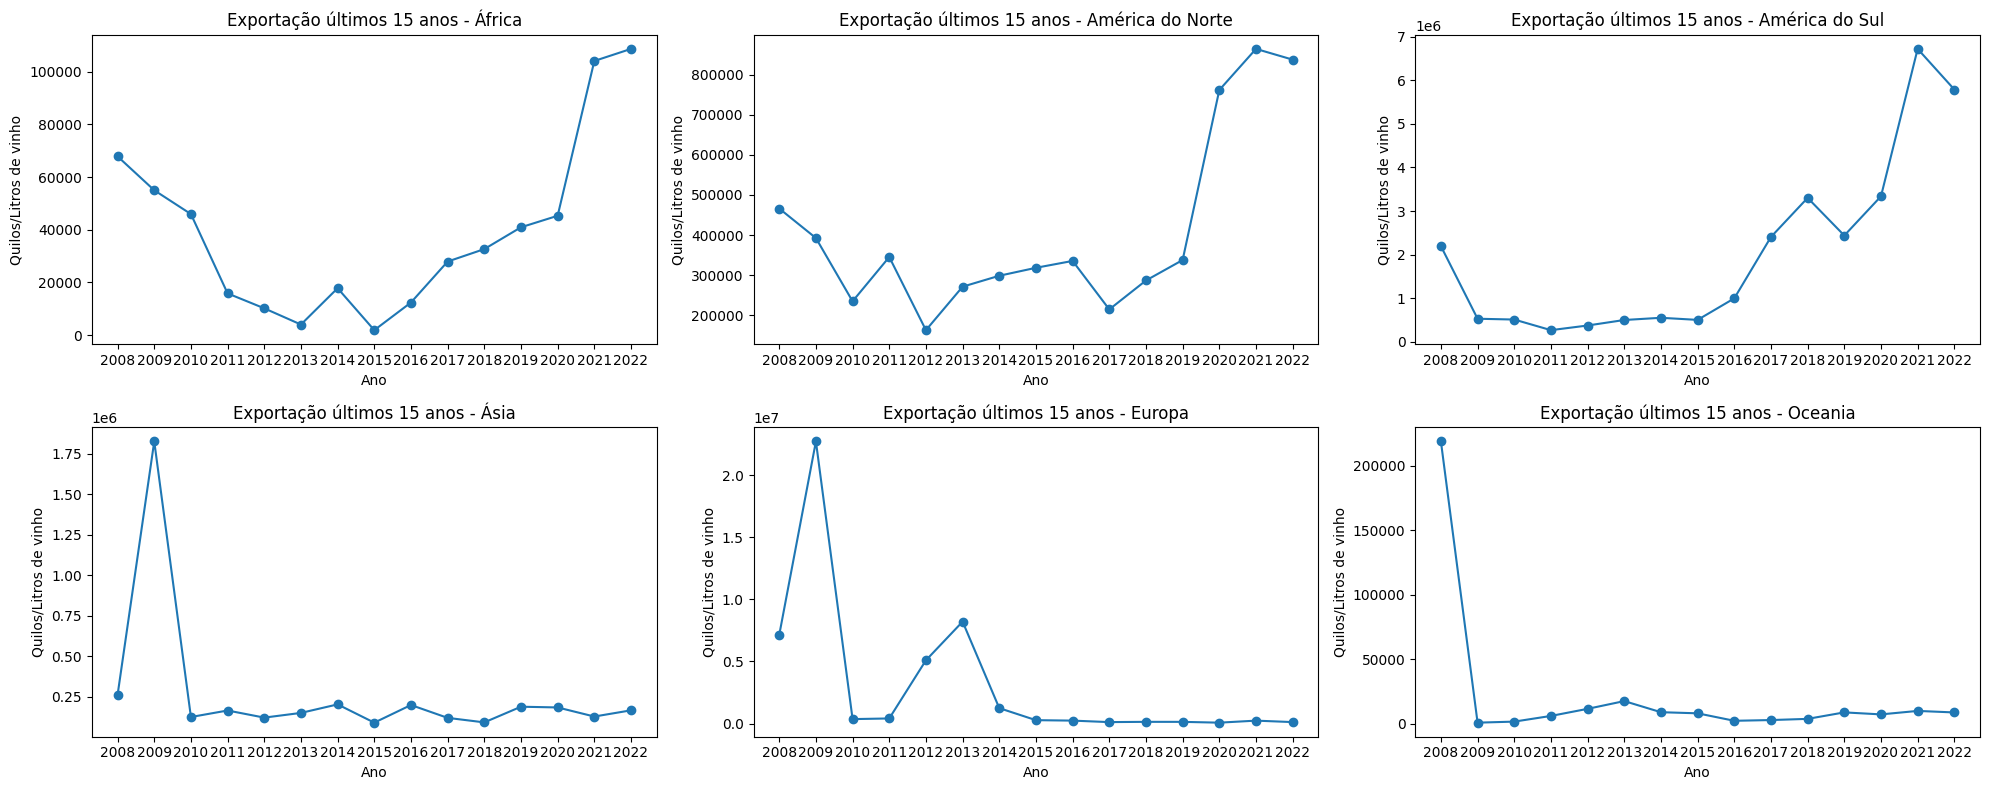

In [600]:
# Número de colunas e linhas para os subplots
num_linhas = 2
num_colunas = 3

# Configuração dos subplots
fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(20, 8))

# Itera sobre o dicionário continent_totals
for i, (continent, totals) in enumerate(continent_totals.items()):
    # Calcula a posição do subplot
    linha = i // num_colunas
    coluna = i % num_colunas

    # Plota o gráfico de linha para o continente atual
    axs[linha, coluna].plot(totals.index, totals.values, label=continent, marker='o', linestyle='-')

    # Adiciona título e legendas
    axs[linha, coluna].set_title(f'Exportação últimos 15 anos - {continent}')
    axs[linha, coluna].set_xlabel('Ano')
    axs[linha, coluna].set_ylabel('Quilos/Litros de vinho')

# Ajusta o layout dos subplots
plt.tight_layout()

# Exibe os gráficos
plt.show()

In [601]:
import plotly.express as px

# Ordenar o DataFrame pela porcentagem total do maior para o menor
prod_quant_sorted = prod_quant.sort_values(by='percentagem_total', ascending=False)

# Ajustar os valores de porcentagem para estar na faixa de 0 a 100
prod_quant_sorted['percentagem_total'] = prod_quant_sorted['percentagem_total'].str.rstrip('%').astype(float)

# Criar o Funil Plot
fig = px.funnel_area(names=prod_quant_sorted['produto'], values=prod_quant_sorted['percentagem_total'])

# Atualizar o layout do gráfico
fig.update_layout(
    title='Produtos mais Produzidos',
    xaxis_title='Porcentagem do Total',
    yaxis_title='Produto',
    title_x=0.5,  # Centraliza o título horizontalmente
    yaxis_tickangle=-45  # Gira os rótulos do eixo y em 45 graus
)

# Mostrar o gráfico
fig.show()

In [602]:
import plotly.express as px

# Filtrar os produtos desejados
produtos_desejados = ['VINHO DE MESA', 'DERIVADOS', 'SUCO', 'VINHO FINO DE MESA (VINÍFERA)']
prod_quant_filtered = prod_quant[prod_quant['produto'].isin(produtos_desejados)]

# Ordenar o DataFrame pela porcentagem total do maior para o menor
prod_quant_sorted = prod_quant_filtered.sort_values(by='percentagem_total', ascending=False)

# Ajustar os valores de porcentagem para estar na faixa de 0 a 100
prod_quant_sorted['percentagem_total'] = prod_quant_sorted['percentagem_total'].str.rstrip('%').astype(float)

# Criar o Funil Plot
fig = px.funnel_area(names=prod_quant_sorted['produto'], values=prod_quant_sorted['percentagem_total'])

# Atualizar o layout do gráfico
fig.update_layout(
    title='Produtos mais Produzidos',
    xaxis_title='Porcentagem do Total',
    yaxis_title='Produto',
    title_x=0.5,  # Centraliza o título horizontalmente
    yaxis_tickangle=-45  # Gira os rótulos do eixo y em 45 graus
)

# Mostrar o gráfico
fig.show()